In [1]:
%%time
import pandas as pd
import pyreadstat
from matplotlib.pyplot import *
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import pyreadstat
import os
from tqdm.dask import TqdmCallback
from tqdm import tqdm
from dask.diagnostics import ProgressBar
from numpy import nan
ProgressBar().register()
tqdm.pandas()

categorical_eleminate_flag=1

CPU times: user 1.31 s, sys: 531 ms, total: 1.84 s
Wall time: 10.4 s


In [2]:
# #loc[] syntax to slice 
# df.loc[:,start:stop:step]

In [3]:
# conda install -c conda-forge jupyter-resource-usage

In [4]:
# from osgeo import ogr

# # Open the shapefile
# shapefile = ogr.Open(r"/home/ee/staff/naveen.cstaff/NFHS_5/IAGE7AFL.shp")

# # Get the layer
# layer = shapefile.GetLayer()

# # Iterate over the features in the layer
# for feature in layer:
#     # Get the attributes of the feature
#     attributes = feature.items()
    
#     # Print the attributes

#     print(attributes)

In [5]:
%%time
# itr = pd.read_stata('IAKR7DFL.DTA')  
# itr.head()
childrens = r"/home/ee/staff/naveen.cstaff/NFHS_5/Childrens_recode/IAKR7DFL.DTA"
childrens_recode, meta1 = pyreadstat.read_dta(childrens)

household = r"/home/ee/staff/naveen.cstaff/NFHS_5/Household_recode_SPSS/IAHR7DFL.SAV"
household_recode, meta2 = pyreadstat.read_sav(household)

induvidual = r"/home/ee/staff/naveen.cstaff/NFHS_5/Induvidual_recode/IAIR74FL.DTA"
induvidual_recode, meta3 = pyreadstat.read_dta(induvidual)

CPU times: user 11min 43s, sys: 1min 31s, total: 13min 14s
Wall time: 13min 13s


In [6]:
childrens_recode['b4'].value_counts(dropna=False).sort_index()

1    120665
2    112255
Name: b4, dtype: int64

<AxesSubplot:>

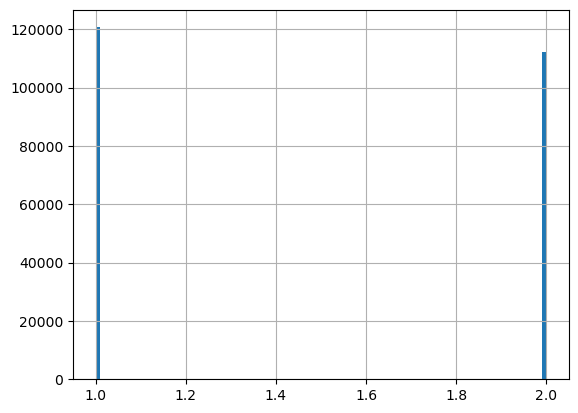

In [7]:
childrens_recode['b4'].hist(bins=100)

In [8]:
childrens_recode[['b5','b6']][childrens_recode['b5']==0]

,b5,b6
9,0,303
94,0,102
188,0,104
275,0,201
279,0,206
...,...,...
232682,0,103
232788,0,302
232828,0,304
232829,0,304


In [9]:
childrens_recode[['b5','b6']]

,b5,b6
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN
...,...,...
232915,1,NaN
232916,1,NaN
232917,1,NaN
232918,1,NaN


In [10]:
indu_temp=induvidual_recode[['caseid','v001','v002','v003','v024']]

In [11]:
indu_temp

,caseid,v001,v002,v003,v024
0,01000101 02,10001,1,2,1
1,01000101 04,10001,1,4,1
2,01000109 01,10001,9,1,1
3,01000109 02,10001,9,2,1
4,01000109 03,10001,9,3,1
...,...,...,...,...,...
699681,36048261 05,360482,61,5,36
699682,36048261 07,360482,61,7,36
699683,36048262 01,360482,62,1,36
699684,36048275 02,360482,75,2,36


In [12]:
# indu_temp['v024'].value_counts(dropna=True).sum()

In [13]:
# childrens_recode['v024'].value_counts(dropna=False)

In [14]:
# %%time
# jn=pd.merge(indu_temp,childrens_recode[['caseid','v001','v002','v003','v024']], how='left', on=['caseid','v001','v002','v003']).progress_apply(lambda x: x)
# # left_on=['v001','v002'],right_on=['v001','v002']
# jn

In [15]:
# jn['v024_y'].value_counts(dropna=False)

In [16]:
# jn[jn['caseid_y'].notnull()]

In [17]:
# jn['v313'].value_counts(dropna=False)

In [18]:
# jn.dropna()

In [19]:
tmp=childrens_recode['v001'].unique()
tmp.sort()

In [20]:
print(tmp)

[  101   102   103 ... 93240 93241 93242]


In [21]:
type(tmp)

numpy.ndarray

In [22]:
tmp=indu_temp['v001'].unique()
tmp.sort()

In [23]:
tmp

array([ 10001,  10002,  10003, ..., 360480, 360481, 360482])

In [24]:
# jn['v024'].value_counts(dropna=False)

In [25]:
childrens_recode[childrens_recode['v024']==1].head()

,caseid,midx,v000,v001,v002,v003,v004,v005,v006,v007,...,s563,s564,s565,s566a,s566b,s566c,s567,s568a,s568b,s568c
0,0100101399 02,1,IA7,113,99,2,113,193444,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
1,0100101357 02,1,IA7,113,57,2,113,193444,9,2019,...,0,NaN,1,1,0,0,1,1,0,0
2,0100101395 02,1,IA7,113,95,2,113,193444,9,2019,...,3,1,1,1,1,1,1,1,1,1
3,0100101358 04,1,IA7,113,58,4,113,193444,9,2019,...,0,NaN,1,1,0,0,1,1,0,0
4,0100101380 02,1,IA7,113,80,2,113,193444,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN


In [26]:
# jn['v024'].value_counts(dropna=False)

In [27]:
indu_temp['v001'].sort_values()

0          10001
27         10001
26         10001
25         10001
24         10001
           ...  
699671    360482
699669    360482
699684    360482
699676    360482
699685    360482
Name: v001, Length: 699686, dtype: int64

In [28]:
childrens_recode['v001'].sort_values()

314         101
313         101
312         101
311         101
310         101
          ...  
139085    93242
139084    93242
139083    93242
139082    93242
139087    93242
Name: v001, Length: 232920, dtype: int64

In [29]:
indu_temp

,caseid,v001,v002,v003,v024
0,01000101 02,10001,1,2,1
1,01000101 04,10001,1,4,1
2,01000109 01,10001,9,1,1
3,01000109 02,10001,9,2,1
4,01000109 03,10001,9,3,1
...,...,...,...,...,...
699681,36048261 05,360482,61,5,36
699682,36048261 07,360482,61,7,36
699683,36048262 01,360482,62,1,36
699684,36048275 02,360482,75,2,36


<AxesSubplot:>

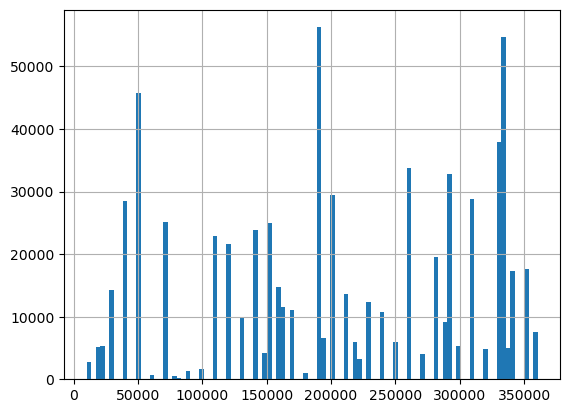

In [30]:
indu_temp['v001'].hist(bins=100)

In [31]:
%%time
jn=pd.merge(indu_temp,childrens_recode[['caseid','v001','v002','v003','v024']], how='left', on=['caseid','v001','v002','v003']).progress_apply(lambda x: x)
# left_on=['v001','v002'],right_on=['v001','v002']
jn

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 316.57it/s]

CPU times: user 1.09 s, sys: 12.8 ms, total: 1.1 s
Wall time: 1.26 s


,caseid,v001,v002,v003,v024_x,v024_y
0,01000101 02,10001,1,2,1,NaN
1,01000101 04,10001,1,4,1,NaN
2,01000109 01,10001,9,1,1,NaN
3,01000109 02,10001,9,2,1,NaN
4,01000109 03,10001,9,3,1,NaN
...,...,...,...,...,...,...
699681,36048261 05,360482,61,5,36,NaN
699682,36048261 07,360482,61,7,36,NaN
699683,36048262 01,360482,62,1,36,NaN
699684,36048275 02,360482,75,2,36,NaN


In [32]:
induvidual_recode[induvidual_recode['caseid']=='0810001047 07']

,caseid,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,s565b_3,s565b_4,s565b_5,s565b_6,s565c_1,s565c_2,s565c_3,s565c_4,s565c_5,s565c_6


In [33]:
childrens_recode

,caseid,midx,v000,v001,v002,v003,v004,v005,v006,v007,...,s563,s564,s565,s566a,s566b,s566c,s567,s568a,s568b,s568c
0,0100101399 02,1,IA7,113,99,2,113,193444,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
1,0100101357 02,1,IA7,113,57,2,113,193444,9,2019,...,0,NaN,1,1,0,0,1,1,0,0
2,0100101395 02,1,IA7,113,95,2,113,193444,9,2019,...,3,1,1,1,1,1,1,1,1,1
3,0100101358 04,1,IA7,113,58,4,113,193444,9,2019,...,0,NaN,1,1,0,0,1,1,0,0
4,0100101380 02,1,IA7,113,80,2,113,193444,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232915,3700401542 04,1,IA7,415,42,4,415,51611,9,2019,...,2,1,1,1,1,1,1,1,1,1
232916,3700401583 04,1,IA7,415,83,4,415,51611,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
232917,3700401546 02,1,IA7,415,46,2,415,51611,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
232918,3700401554 02,1,IA7,415,54,2,415,51611,9,2019,...,NaN,NaN,1,1,1,1,1,1,1,1


In [34]:
jn.dropna()

,caseid,v001,v002,v003,v024_x,v024_y


In [35]:
# jn['v024'].value_counts(dropna=False)

In [36]:
pd.merge(indu_temp,childrens_recode[['v001']], how='left', on=['v001']).progress_apply(lambda x: x)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 247.61it/s]


,caseid,v001,v002,v003,v024
0,01000101 02,10001,1,2,1
1,01000101 02,10001,1,2,1
2,01000101 02,10001,1,2,1
3,01000101 02,10001,1,2,1
4,01000101 02,10001,1,2,1
...,...,...,...,...,...
958927,36048261 05,360482,61,5,36
958928,36048261 07,360482,61,7,36
958929,36048262 01,360482,62,1,36
958930,36048275 02,360482,75,2,36


In [37]:
geo_covariates = pd.read_csv( r"/home/ee/staff/naveen.cstaff/NFHS_5/IAGC7AFL.csv")
geo_covariates

,DHSID,GPS_Dataset,DHSCC,DHSYEAR,DHSCLUST,SurveyID,All_Population_Count_2000,All_Population_Count_2005,All_Population_Count_2010,All_Population_Count_2015,...,UN_Population_Density_2000,UN_Population_Density_2005,UN_Population_Density_2010,UN_Population_Density_2015,UN_Population_Density_2020,Wet_Days_2000,Wet_Days_2005,Wet_Days_2010,Wet_Days_2015,Wet_Days_2020
0,IA202000000101,IAGE7AFL,IA,2020,101,IA2020DHS,3199.854004,3890.402100,4839.754883,6276.751465,...,96.815781,112.262970,128.732666,145.942459,164.328812,7.393508,7.220779,9.048222,8.983718,7.902588
1,IA202000000102,IAGE7AFL,IA,2020,102,IA2020DHS,8283.474609,11848.558590,11996.692380,17494.037110,...,251.101440,291.165253,333.881073,378.516388,426.203247,6.116502,6.171632,7.352612,7.506896,6.663806
2,IA202000000103,IAGE7AFL,IA,2020,103,IA2020DHS,3699.705322,4621.544922,5807.593262,4998.018066,...,251.101440,291.165253,333.881103,378.516418,426.203278,6.058377,6.120590,7.320251,7.410959,6.569952
3,IA202000000104,IAGE7AFL,IA,2020,104,IA2020DHS,1956.255127,4486.761719,2770.050049,4336.997559,...,186.754562,216.551697,248.321228,281.518372,316.985077,6.724518,6.691888,8.271159,8.051432,6.993216
4,IA202000000105,IAGE7AFL,IA,2020,105,IA2020DHS,7071.920898,6789.106934,9805.679688,7841.865723,...,319.289978,370.233459,424.549072,481.305450,541.942078,6.646566,6.620811,8.073069,8.076919,7.098320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30192,IA202000093238,IAGE7AFL,IA,2020,93238,IA2020DHS,12126.673830,13869.227540,14613.843750,15136.490230,...,568.823059,603.204102,632.576843,655.847595,675.354431,6.004258,5.730234,5.780586,5.844596,5.975898
30193,IA202000093239,IAGE7AFL,IA,2020,93239,IA2020DHS,17690.558590,22561.904300,21358.431640,26020.994140,...,814.881103,864.134582,906.213196,939.550232,967.495178,5.918984,5.666696,5.755661,5.858534,5.928388
30194,IA202000093240,IAGE7AFL,IA,2020,93240,IA2020DHS,15482.144530,16104.868160,16614.427730,16762.785160,...,734.206604,778.583862,816.496582,846.533325,871.711609,6.135872,5.793711,5.916120,5.980312,6.065729
30195,IA202000093241,IAGE7AFL,IA,2020,93241,IA2020DHS,11474.786130,14924.610350,13220.788090,15659.872070,...,782.526245,829.824097,870.231995,902.245422,929.080750,6.199533,5.864545,5.923123,5.969970,6.143644


In [38]:
geosp = pd.read_csv( r"/home/ee/staff/naveen.cstaff/NFHS_5/geospatial.csv")
geosp

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM
0,IA202000000101,IA,2020.0,101.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,U,34.382727,73.848621,511.0,1927.0,WGS84
1,IA202000000102,IA,2020.0,102.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.404180,74.294310,1621.0,1621.0,WGS84
2,IA202000000103,IA,2020.0,103.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.455160,74.364586,1745.0,1760.0,WGS84
3,IA202000000104,IA,2020.0,104.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.559398,74.068008,2013.0,2016.0,WGS84
4,IA202000000105,IA,2020.0,105.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.457346,74.094578,405.0,1941.0,WGS84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30192,IA202000093238,IA,2020.0,93238.0,IN,NaN,NaN,NaN,NaN,19.0,WEST BENGAL,932.0,Purba Barddhaman,GPS,R,23.191093,88.056766,9.0,27.0,WGS84
30193,IA202000093239,IA,2020.0,93239.0,IN,NaN,NaN,NaN,NaN,19.0,WEST BENGAL,932.0,Purba Barddhaman,GPS,R,23.395079,88.139663,21.0,20.0,WGS84
30194,IA202000093240,IA,2020.0,93240.0,IN,NaN,NaN,NaN,NaN,19.0,WEST BENGAL,932.0,Purba Barddhaman,GPS,R,23.205505,88.308991,14.0,17.0,WGS84
30195,IA202000093241,IA,2020.0,93241.0,IN,NaN,NaN,NaN,NaN,19.0,WEST BENGAL,932.0,Purba Barddhaman,GPS,R,23.097570,88.092668,4.0,24.0,WGS84


In [39]:
childrens_recode

,caseid,midx,v000,v001,v002,v003,v004,v005,v006,v007,...,s563,s564,s565,s566a,s566b,s566c,s567,s568a,s568b,s568c
0,0100101399 02,1,IA7,113,99,2,113,193444,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
1,0100101357 02,1,IA7,113,57,2,113,193444,9,2019,...,0,NaN,1,1,0,0,1,1,0,0
2,0100101395 02,1,IA7,113,95,2,113,193444,9,2019,...,3,1,1,1,1,1,1,1,1,1
3,0100101358 04,1,IA7,113,58,4,113,193444,9,2019,...,0,NaN,1,1,0,0,1,1,0,0
4,0100101380 02,1,IA7,113,80,2,113,193444,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232915,3700401542 04,1,IA7,415,42,4,415,51611,9,2019,...,2,1,1,1,1,1,1,1,1,1
232916,3700401583 04,1,IA7,415,83,4,415,51611,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
232917,3700401546 02,1,IA7,415,46,2,415,51611,9,2019,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
232918,3700401554 02,1,IA7,415,54,2,415,51611,9,2019,...,NaN,NaN,1,1,1,1,1,1,1,1


In [40]:
household_recode

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SH94$1,SH94$2,SH94$3,SH94$4,SH94$5,SH95$1,SH95$2,SH95$3,SH95$4,SH95$5
0,0100101305,IA7,113.0,5.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,0100101345,IA7,113.0,45.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0100101383,IA7,113.0,83.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0100101334,IA7,113.0,34.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0100101356,IA7,113.0,56.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636694,3700401549,IA7,415.0,49.0,3.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636695,3700401554,IA7,415.0,54.0,1.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636696,3700401544,IA7,415.0,44.0,1.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636697,3700401535,IA7,415.0,35.0,3.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
induvidual_recode

,caseid,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,s565b_3,s565b_4,s565b_5,s565b_6,s565c_1,s565c_2,s565c_3,s565c_4,s565c_5,s565c_6
0,01000101 02,IA6,10001,1,2,1,191760,7,2015,1387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01000101 04,IA6,10001,1,4,1,191760,7,2015,1387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01000109 01,IA6,10001,9,1,1,191760,7,2015,1387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01000109 02,IA6,10001,9,2,1,191760,7,2015,1387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01000109 03,IA6,10001,9,3,1,191760,7,2015,1387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699681,36048261 05,IA6,360482,61,5,482,2380715,5,2015,1385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699682,36048261 07,IA6,360482,61,7,482,2380715,5,2015,1385,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
699683,36048262 01,IA6,360482,62,1,482,2380715,5,2015,1385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699684,36048275 02,IA6,360482,75,2,482,2380715,5,2015,1385,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN


In [42]:
# jn.iloc[:,6250:6300:1]

In [43]:
household_recode[['HHID','HV002','HV201A','SHCREFUSE']]

,HHID,HV002,HV201A,SHCREFUSE
0,0100101305,5.0,NaN,NaN
1,0100101345,45.0,NaN,NaN
2,0100101383,83.0,NaN,NaN
3,0100101334,34.0,NaN,NaN
4,0100101356,56.0,NaN,NaN
...,...,...,...,...
636694,3700401549,49.0,NaN,NaN
636695,3700401554,54.0,NaN,NaN
636696,3700401544,44.0,NaN,NaN
636697,3700401535,35.0,NaN,NaN


In [44]:
household_recode['HC70$1'].value_counts(dropna=False)

 NaN       478149
 9998.0      3140
-124.0        468
-187.0        464
-153.0        459
            ...  
 558.0          3
 587.0          3
 535.0          2
 593.0          2
 559.0          2
Name: HC70$1, Length: 1204, dtype: int64

In [45]:
household_recode.columns.get_loc('HC70$1')

4597

In [46]:
household_recode.iloc[:,4595:4620:1]

,HC68$8,HC68$9,HC70$1,HC70$2,HC70$3,HC70$4,HC70$5,HC70$6,HC70$7,HC70$8,...,HC71$5,HC71$6,HC71$7,HC71$8,HC71$9,HC72$1,HC72$2,HC72$3,HC72$4,HC72$5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636695,NaN,NaN,-550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9996.0,NaN,NaN,NaN,NaN
636696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
household_recode['highest_grade_comp']=household_recode.iloc[:,1523:1558:1].max(axis=1)
household_recode

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SH94$2,SH94$3,SH94$4,SH94$5,SH95$1,SH95$2,SH95$3,SH95$4,SH95$5,highest_grade_comp
0,0100101305,IA7,113.0,5.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,15.0
1,0100101345,IA7,113.0,45.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2,0100101383,IA7,113.0,83.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
3,0100101334,IA7,113.0,34.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,0100101356,IA7,113.0,56.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636694,3700401549,IA7,415.0,49.0,3.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
636695,3700401554,IA7,415.0,54.0,1.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
636696,3700401544,IA7,415.0,44.0,1.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
636697,3700401535,IA7,415.0,35.0,3.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [48]:
# if categorical_eleminate_flag==0:
#     household_recode['highest_grade_comp']=household_recode.iloc[:,1523:1558:1].max(axis=1)
#     household_recode

In [49]:
household_recode.iloc[:,261:300:1].columns

Index(['SV271RS', 'SHCREFUSE', 'HVIDX$01', 'HVIDX$02', 'HVIDX$03', 'HVIDX$04',
       'HVIDX$05', 'HVIDX$06', 'HVIDX$07', 'HVIDX$08', 'HVIDX$09', 'HVIDX$10',
       'HVIDX$11', 'HVIDX$12', 'HVIDX$13', 'HVIDX$14', 'HVIDX$15', 'HVIDX$16',
       'HVIDX$17', 'HVIDX$18', 'HVIDX$19', 'HVIDX$20', 'HVIDX$21', 'HVIDX$22',
       'HVIDX$23', 'HVIDX$24', 'HVIDX$25', 'HVIDX$26', 'HVIDX$27', 'HVIDX$28',
       'HVIDX$29', 'HVIDX$30', 'HVIDX$31', 'HVIDX$32', 'HVIDX$33', 'HVIDX$34',
       'HVIDX$35', 'HV101$01', 'HV101$02'],
      dtype='object')

In [50]:
household_recode.columns.get_loc("SH20$01")

1523

In [51]:
# household_recode[household_recode['HHID']>=3700401542]

# 12-23 months

In [52]:
childrens_recode=childrens_recode[(childrens_recode['hw1']>=12) & (childrens_recode['hw1']<=23)]
childrens_recode.reset_index(inplace=True)
childrens_recode

,index,caseid,midx,v000,v001,v002,v003,v004,v005,v006,...,s563,s564,s565,s566a,s566b,s566c,s567,s568a,s568b,s568c
0,1,0100101357 02,1,IA7,113,57,2,113,193444,9,...,0,NaN,1,1,0,0,1,1,0,0
1,3,0100101358 04,1,IA7,113,58,4,113,193444,9,...,0,NaN,1,1,0,0,1,1,0,0
2,12,0100100690 02,1,IA7,106,90,2,106,211589,9,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
3,19,0100102986 02,1,IA7,129,86,2,129,212586,11,...,2,1,1,1,1,1,1,1,1,1
4,21,0100102945 02,1,IA7,129,45,2,129,212586,11,...,2,1,1,1,1,1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,232898,3700402011 02,1,IA7,420,11,2,420,50931,9,...,1,1,1,1,1,1,1,1,1,1
43177,232911,3700401534 10,2,IA7,415,34,10,415,51611,9,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
43178,232912,3700401534 14,1,IA7,415,34,14,415,51611,9,...,3,1,1,1,0,0,0,NaN,NaN,NaN
43179,232915,3700401542 04,1,IA7,415,42,4,415,51611,9,...,2,1,1,1,1,1,1,1,1,1


In [53]:
childrens_recode

,index,caseid,midx,v000,v001,v002,v003,v004,v005,v006,...,s563,s564,s565,s566a,s566b,s566c,s567,s568a,s568b,s568c
0,1,0100101357 02,1,IA7,113,57,2,113,193444,9,...,0,NaN,1,1,0,0,1,1,0,0
1,3,0100101358 04,1,IA7,113,58,4,113,193444,9,...,0,NaN,1,1,0,0,1,1,0,0
2,12,0100100690 02,1,IA7,106,90,2,106,211589,9,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
3,19,0100102986 02,1,IA7,129,86,2,129,212586,11,...,2,1,1,1,1,1,1,1,1,1
4,21,0100102945 02,1,IA7,129,45,2,129,212586,11,...,2,1,1,1,1,1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,232898,3700402011 02,1,IA7,420,11,2,420,50931,9,...,1,1,1,1,1,1,1,1,1,1
43177,232911,3700401534 10,2,IA7,415,34,10,415,51611,9,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
43178,232912,3700401534 14,1,IA7,415,34,14,415,51611,9,...,3,1,1,1,0,0,0,NaN,NaN,NaN
43179,232915,3700401542 04,1,IA7,415,42,4,415,51611,9,...,2,1,1,1,1,1,1,1,1,1


In [54]:
childrens_recode[['caseid','v001','v002','sdist','v024']]

,caseid,v001,v002,sdist,v024
0,0100101357 02,113,57,1,1
1,0100101358 04,113,58,1,1
2,0100100690 02,106,90,1,1
3,0100102986 02,129,86,1,1
4,0100102945 02,129,45,1,1
...,...,...,...,...,...
43176,3700402011 02,420,11,4,37
43177,3700401534 10,415,34,4,37
43178,3700401534 14,415,34,4,37
43179,3700401542 04,415,42,4,37


In [55]:
s1 = pd.merge(childrens_recode.loc[[200]], household_recode, how='left', left_on=['v001','v002'],right_on=['HV001','HV002']).progress_apply(lambda x: x)

100%|████████████████████████████████████████████████████████████████████████████| 8128/8128 [00:00<00:00, 14449.29it/s]


In [56]:
s1[['caseid','v001','v002','v024','sdist','HHID','HV002','HV024','SHDIST','HV024']]

,caseid,v001,v002,v024,sdist,HHID,HV002,HV024,SHDIST,HV024
0,0100601139 02,611,39,1,6,0100601139,39.0,1.0,6.0,1.0


In [57]:
household_recode[(household_recode['HV001']==113) & (household_recode['HV002']==57)]

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SH94$2,SH94$3,SH94$4,SH94$5,SH95$1,SH95$2,SH95$3,SH95$4,SH95$5,highest_grade_comp
11,0100101357,IA7,113.0,57.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


In [58]:
s1 = pd.merge(childrens_recode.loc[[1]], household_recode, how='left', left_on=['v001','v002'],right_on=['HV001','HV002']).progress_apply(lambda x: x)

100%|████████████████████████████████████████████████████████████████████████████| 8128/8128 [00:00<00:00, 12846.31it/s]


In [59]:
s1[['caseid','v002','v024','sdist','HHID','HV002','HV024','SHDIST']]

,caseid,v002,v024,sdist,HHID,HV002,HV024,SHDIST
0,0100101358 04,58,1,1,0100101358,58.0,1.0,1.0


In [60]:
# %%time
# s1 = pd.merge(childrens_recode, household_recode, how='left', left_on=['v001','v002'],right_on=['HV001','HV002']).progress_apply(lambda x: x)

In [61]:
# s1

In [62]:
household_recode

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SH94$2,SH94$3,SH94$4,SH94$5,SH95$1,SH95$2,SH95$3,SH95$4,SH95$5,highest_grade_comp
0,0100101305,IA7,113.0,5.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,15.0
1,0100101345,IA7,113.0,45.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2,0100101383,IA7,113.0,83.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
3,0100101334,IA7,113.0,34.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,0100101356,IA7,113.0,56.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636694,3700401549,IA7,415.0,49.0,3.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
636695,3700401554,IA7,415.0,54.0,1.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
636696,3700401544,IA7,415.0,44.0,1.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
636697,3700401535,IA7,415.0,35.0,3.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [63]:
# childrens_recode=childrens_recode[['v024','sdist','h9','h9a','hw1']]
# childrens_recode=childrens_recode[childrens_recode['v024']==9]
childrens_recode

,index,caseid,midx,v000,v001,v002,v003,v004,v005,v006,...,s563,s564,s565,s566a,s566b,s566c,s567,s568a,s568b,s568c
0,1,0100101357 02,1,IA7,113,57,2,113,193444,9,...,0,NaN,1,1,0,0,1,1,0,0
1,3,0100101358 04,1,IA7,113,58,4,113,193444,9,...,0,NaN,1,1,0,0,1,1,0,0
2,12,0100100690 02,1,IA7,106,90,2,106,211589,9,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
3,19,0100102986 02,1,IA7,129,86,2,129,212586,11,...,2,1,1,1,1,1,1,1,1,1
4,21,0100102945 02,1,IA7,129,45,2,129,212586,11,...,2,1,1,1,1,1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,232898,3700402011 02,1,IA7,420,11,2,420,50931,9,...,1,1,1,1,1,1,1,1,1,1
43177,232911,3700401534 10,2,IA7,415,34,10,415,51611,9,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN
43178,232912,3700401534 14,1,IA7,415,34,14,415,51611,9,...,3,1,1,1,0,0,0,NaN,NaN,NaN
43179,232915,3700401542 04,1,IA7,415,42,4,415,51611,9,...,2,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

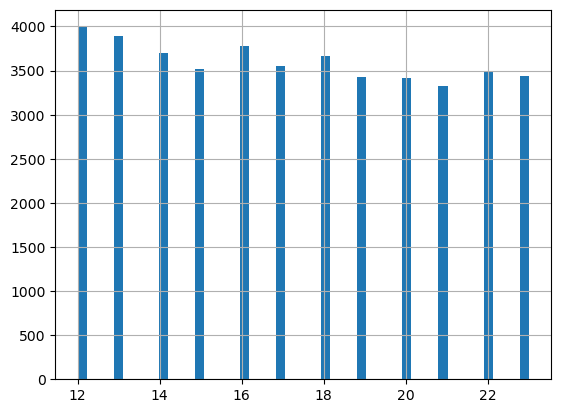

In [64]:
childrens_recode['hw1'].hist(bins=50)

<AxesSubplot:>

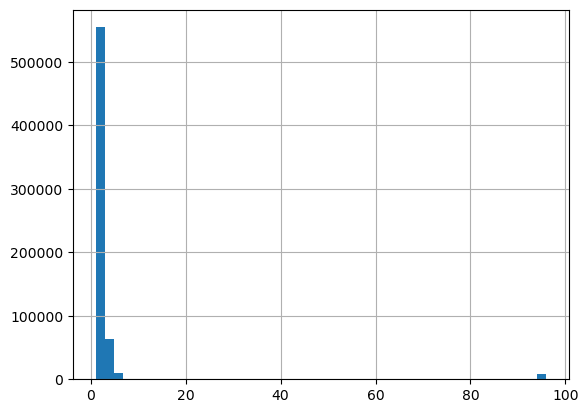

In [65]:
household_recode['SH47'].hist(bins=50)

In [66]:
sorted(childrens_recode['v002'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [67]:
childrens_recode['v116'].value_counts().sort_index()

11     2276
12    17197
13     5836
14      305
15       59
21      273
22     2639
23      681
31     8881
41     2263
44      522
96      159
97     2090
Name: v116, dtype: int64

In [68]:
def impr_ws(row):
    if row['v113']==32 or row['v113']==42 or row['v113']==43:
        val = 0
    elif row['v113']==99 or row['v113']==97 or row['v113']==96:
        val = None
    else:
        val = 1
    return val

In [69]:
childrens_recode['impr_ws'] = childrens_recode.progress_apply(impr_ws, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:02<00:00, 17013.75it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/2166540501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['impr_ws'] = childrens_recode.progress_apply(impr_ws, axis=1)


In [70]:
childrens_recode['impr_ws'].value_counts(dropna=False).sort_index()

0.0     2643
1.0    38294
NaN     2244
Name: impr_ws, dtype: int64

In [71]:
def unimpr_ws(row):
    if row['impr_ws']==1:
        val = 0
    elif row['impr_ws']==0:
        val = 1
    else:
        val = row['impr_ws']
    return val

In [72]:
childrens_recode['unimpr_ws'] = childrens_recode.progress_apply(unimpr_ws, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 23934.85it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/3346382954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['unimpr_ws'] = childrens_recode.progress_apply(unimpr_ws, axis=1)


In [73]:
childrens_recode['unimpr_ws'].value_counts(dropna=False).sort_index()

0.0    38294
1.0     2643
NaN     2244
Name: unimpr_ws, dtype: int64

In [74]:
def basic_drinking_w(row):
    if row['impr_ws']==1 and (row['v115'] <=30 or row['v115'] == 996):
        val = 1
    elif row['impr_ws']==0 and ((row['v115'] >=0 and row['v115'] <=900) or (row['v115']==996)):
        val = 0
    else:
        val = None
    return val

In [75]:
childrens_recode['basic_drinking_w'] = childrens_recode.apply(basic_drinking_w, axis=1)

/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/2780526611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['basic_drinking_w'] = childrens_recode.apply(basic_drinking_w, axis=1)


In [76]:
a=childrens_recode[['impr_ws','v115','basic_drinking_w']]
# [(childrens_recode['basic_drinking_w'].isnull())].sort_values(by=['basic_drinking_w'], ascending=False)
# a
childrens_recode['basic_drinking_w'].value_counts(dropna=False).sort_index()

0.0     2635
1.0    37801
NaN     2745
Name: basic_drinking_w, dtype: int64

In [77]:
def limited_drinking_w(row):
    if row['impr_ws']==1 and (row['v115'] >30 or row['v115'] <=900):
        val = 1
    elif row['v115'] ==996 or row['v115'] <=30:
        val = 0
    else:
        val = None
    return val

In [78]:
childrens_recode['limited_drinking_w'] = childrens_recode.progress_apply(limited_drinking_w, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:02<00:00, 21335.73it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/3739799205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['limited_drinking_w'] = childrens_recode.progress_apply(limited_drinking_w, axis=1)


In [79]:
childrens_recode['limited_drinking_w'].value_counts(dropna=False).sort_index()

0.0     2620
1.0    38294
NaN     2267
Name: limited_drinking_w, dtype: int64

In [80]:
def jmp_w8(row):
    if row['impr_ws']==1 and row['v115']==996:
        val = 1
    elif row['v115']==998 or row['v115']==999:
        val = None
    else:
        val = 0
    return val

In [81]:
childrens_recode['jmp_w8'] = childrens_recode.progress_apply(jmp_w8, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:02<00:00, 21044.98it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/1165083532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['jmp_w8'] = childrens_recode.progress_apply(jmp_w8, axis=1)


In [82]:
childrens_recode['jmp_w8'].value_counts(dropna=False).sort_index()

0.0    15141
1.0    28006
NaN       34
Name: jmp_w8, dtype: int64

In [83]:
def jmp_w2(row):
    if row['v113'] in (10,11,12,13,14):
        val = 1
    elif row['v113'] in (97,99):
        val = None
    else:
        val = 0
    return val

In [84]:
childrens_recode['jmp_w2'] = childrens_recode.progress_apply(jmp_w2, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 22353.75it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/3362213466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['jmp_w2'] = childrens_recode.progress_apply(jmp_w2, axis=1)


In [85]:
childrens_recode['jmp_w2'].value_counts(dropna=False).sort_index()

0.0    23247
1.0    17844
NaN     2090
Name: jmp_w2, dtype: int64

In [86]:
def jmp_w5(row):
    if row['v113']==43:
        val = 1
    elif row['v113'] in (97,99):
        val = None
    else:
        val = 0
    return val

In [87]:
childrens_recode['jmp_w5'] = childrens_recode.progress_apply(jmp_w5, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 21659.49it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/3515141945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['jmp_w5'] = childrens_recode.progress_apply(jmp_w5, axis=1)


In [88]:
childrens_recode['jmp_w5'].value_counts(dropna=False).sort_index()

0.0    40471
1.0      620
NaN     2090
Name: jmp_w5, dtype: int64

In [89]:
def jmp_s1(row):
    if row['v116'] in (10,11,12,13,15,20,21,22,41):
        val = 1
    elif row['v116'] in (14,23,30,31,42,43,96):
        val = 0
    else:
        val = None
    return val

In [90]:
childrens_recode['jmp_s1'] = childrens_recode.progress_apply(jmp_w5, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 21812.84it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/941187279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['jmp_s1'] = childrens_recode.progress_apply(jmp_w5, axis=1)


In [91]:
childrens_recode['jmp_s1'].value_counts(dropna=False).sort_index()

0.0    40471
1.0      620
NaN     2090
Name: jmp_s1, dtype: int64

In [92]:
def jmp_s6(row):
    if row['v116']==31:
        val = 1
    elif row['v116'] in (96,97,99):
        val = None
    else:
        val = 0
    return val

In [93]:
childrens_recode['jmp_s6'] = childrens_recode.progress_apply(jmp_s6, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 21941.80it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/3134094806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['jmp_s6'] = childrens_recode.progress_apply(jmp_s6, axis=1)


In [94]:
childrens_recode['jmp_s6'].value_counts(dropna=False).sort_index()

0.0    32051
1.0     8881
NaN     2249
Name: jmp_s6, dtype: int64

In [95]:
def jmp_s8(row):
    if row['jmp_s1']==1 and row['v160']==0:
        val = 1
    elif np.isnan(row['jmp_s1']) or row['v160'] in (7,9):
        val = None
    else:
        val = 0
    return val

In [96]:
childrens_recode['jmp_s8'] = childrens_recode.progress_apply(jmp_s8, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:02<00:00, 18973.02it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/2411485363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['jmp_s8'] = childrens_recode.progress_apply(jmp_s8, axis=1)


In [97]:
childrens_recode['jmp_s8'].value_counts(dropna=False).sort_index()

0.0    40629
1.0      462
NaN     2090
Name: jmp_s8, dtype: int64

In [98]:
def jmp_s7(row):
    if row['jmp_s1']==1 and row['v160']==1:
        val = 1
    elif np.isnan(row['jmp_s1']) or row['v160'] in (7,9):
        val = None
    else:
        val = 0
    return val

In [99]:
childrens_recode['jmp_s7'] = childrens_recode.progress_apply(jmp_s7, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:02<00:00, 18807.55it/s]
/var/tmp/pbs.3566654.pbshpc/ipykernel_22239/3160997980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_recode['jmp_s7'] = childrens_recode.progress_apply(jmp_s7, axis=1)


In [100]:
childrens_recode['jmp_s7'].value_counts(dropna=False).sort_index()

0.0    41034
1.0       57
NaN     2090
Name: jmp_s7, dtype: int64

# MERGER

In [101]:
childrens_recode_new_cols=childrens_recode.loc[:, ['caseid','v001','v002','v024','sdist',
                                                   'v106','v107','v130','b5','m14','v501','v502',
                                                   'v504','v505','s413','s414','m1',
                                                   'h3','h5','h7','h51','h52','h53','s565','s567','s314c','m76','m15',
                                                   'h2','h0','h4','h6','h8','h50','h61','h62','h63','h57','h58','h59',
                                                   'je1','je2','h9','h9a','s513t','v042','v455','v457','v213','v169a',
                                                   'hw70','hw71','hw72','hw73','v481','s457','s458a','s934','m70','v119',
                                                   'v313','s190s','s190us','s190rs','v013','v511','b4','h55'
                                                  ]]
childrens_recode_new_cols

,caseid,v001,v002,v024,sdist,v106,v107,v130,b5,m14,...,m70,v119,v313,s190s,s190us,s190rs,v013,v511,b4,h55
0,0100101357 02,113,57,1,1,1,4,2,1,6,...,0,1,3,1,NaN,1,5,24,2,NaN
1,0100101358 04,113,58,1,1,2,7,2,1,16,...,0,1,3,2,NaN,2,4,28,1,NaN
2,0100100690 02,106,90,1,1,1,4,2,1,13,...,0,1,3,3,NaN,4,5,33,2,NaN
3,0100102986 02,129,86,1,1,2,2,2,1,8,...,1,1,3,1,NaN,1,2,22,2,NaN
4,0100102945 02,129,45,1,1,3,5,2,1,7,...,1,1,3,4,NaN,4,4,26,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,3700402011 02,420,11,37,4,2,4,2,1,13,...,0,1,3,5,3,NaN,5,29,1,NaN
43177,3700401534 10,415,34,37,4,2,3,2,1,NaN,...,NaN,1,0,5,5,NaN,4,27,2,NaN
43178,3700401534 14,415,34,37,4,0,NaN,2,1,9,...,0,1,3,5,5,NaN,3,21,1,NaN
43179,3700401542 04,415,42,37,4,0,NaN,2,1,12,...,1,1,3,1,1,NaN,2,22,2,NaN


In [102]:
childrens_recode_new_cols=childrens_recode_new_cols.reset_index(drop=True).merge(childrens_recode.loc[:,'impr_ws':].reset_index(drop=True), left_index=True, right_index=True)
childrens_recode_new_cols

,caseid,v001,v002,v024,sdist,v106,v107,v130,b5,m14,...,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,jmp_s8,jmp_s7
0,0100101357 02,113,57,1,1,1,4,2,1,6,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0100101358 04,113,58,1,1,2,7,2,1,16,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0100100690 02,106,90,1,1,1,4,2,1,13,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0100102986 02,129,86,1,1,2,2,2,1,8,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0100102945 02,129,45,1,1,3,5,2,1,7,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,3700402011 02,420,11,37,4,2,4,2,1,13,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43177,3700401534 10,415,34,37,4,2,3,2,1,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43178,3700401534 14,415,34,37,4,0,NaN,2,1,9,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43179,3700401542 04,415,42,37,4,0,NaN,2,1,12,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
household_recode

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SH94$2,SH94$3,SH94$4,SH94$5,SH95$1,SH95$2,SH95$3,SH95$4,SH95$5,highest_grade_comp
0,0100101305,IA7,113.0,5.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,15.0
1,0100101345,IA7,113.0,45.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2,0100101383,IA7,113.0,83.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
3,0100101334,IA7,113.0,34.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,0100101356,IA7,113.0,56.0,1.0,113.0,196202.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636694,3700401549,IA7,415.0,49.0,3.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
636695,3700401554,IA7,415.0,54.0,1.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
636696,3700401544,IA7,415.0,44.0,1.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
636697,3700401535,IA7,415.0,35.0,3.0,415.0,50597.0,9.0,2019.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [104]:
%%time
household_recode_required_cols=household_recode[['HHID','SHDIST','HV001','HV002',
                                                 'HV024','HV230A','HV230B','HV232','HV232B',
                                                 'HV213','HV214','HV215','HV201A','highest_grade_comp',
                                                 'SH61','HV244','SH75','HV226','SH49','HV247','HV270','HV271','HV270A',
                                                 'HV271A'
                                                ]]

s1 = pd.merge(childrens_recode_new_cols, household_recode_required_cols, how='left', left_on=['v001','v002'],right_on=['HV001','HV002']).progress_apply(lambda x: x)

100%|███████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 1367.59it/s]

CPU times: user 500 ms, sys: 13.9 ms, total: 514 ms
Wall time: 510 ms


In [105]:
x_comb=childrens_recode['s190us'].combine_first(childrens_recode['s190rs'])
x_comb

0        1
1        2
2        4
3        1
4        4
        ..
43176    3
43177    5
43178    5
43179    1
43180    4
Name: s190us, Length: 43181, dtype: object

In [106]:
s1['x_comb']=x_comb
s1

,caseid,v001,v002,v024,sdist,v106,v107,v130,b5,m14,...,HV244,SH75,HV226,SH49,HV247,HV270,HV271,HV270A,HV271A,x_comb
0,0100101357 02,113,57,1,1,1,4,2,1,6,...,1.0,1.0,8.0,4.0,1.0,1.0,-881310.0,2.0,-667160.0,1
1,0100101358 04,113,58,1,1,2,7,2,1,16,...,1.0,1.0,1.0,4.0,1.0,3.0,-73821.0,3.0,220010.0,2
2,0100100690 02,106,90,1,1,1,4,2,1,13,...,1.0,1.0,2.0,3.0,1.0,4.0,615690.0,4.0,977569.0,4
3,0100102986 02,129,86,1,1,2,2,2,1,8,...,1.0,1.0,8.0,4.0,1.0,2.0,-592690.0,2.0,-350060.0,1
4,0100102945 02,129,45,1,1,3,5,2,1,7,...,1.0,0.0,2.0,4.0,1.0,4.0,887910.0,5.0,1276650.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,3700402011 02,420,11,37,4,2,4,2,1,13,...,0.0,1.0,1.0,2.0,1.0,4.0,684429.0,2.0,-169451.0,3
43177,3700401534 10,415,34,37,4,2,3,2,1,NaN,...,1.0,1.0,2.0,2.0,1.0,5.0,1144200.0,3.0,424380.0,5
43178,3700401534 14,415,34,37,4,0,NaN,2,1,9,...,1.0,1.0,2.0,2.0,1.0,5.0,1144200.0,3.0,424380.0,5
43179,3700401542 04,415,42,37,4,0,NaN,2,1,12,...,1.0,1.0,8.0,2.0,1.0,1.0,-1254100.0,1.0,-2673300.0,1


In [107]:
s1[['HHID','caseid','SHDIST','sdist']]

,HHID,caseid,SHDIST,sdist
0,0100101357,0100101357 02,1.0,1
1,0100101358,0100101358 04,1.0,1
2,0100100690,0100100690 02,1.0,1
3,0100102986,0100102986 02,1.0,1
4,0100102945,0100102945 02,1.0,1
...,...,...,...,...
43176,3700402011,3700402011 02,4.0,4
43177,3700401534,3700401534 10,4.0,4
43178,3700401534,3700401534 14,4.0,4
43179,3700401542,3700401542 04,4.0,4


In [108]:
def jmp_w9(row):
    if row['impr_ws']==1 and row['HV201A']==0:
        val = 1
    elif row['HV201A']==9 or np.isnan(row['HV201A']):
        val = None
    else:
        val = 0
    return val

In [109]:
# s1['jmp_w9'] = s1.progress_apply(jmp_w9, axis=1)

In [110]:
# s1['jmp_w9']=s1['jmp_w9'].replace(to_replace=[None], value=np.nan)

In [111]:
# s1['jmp_w9'].value_counts(dropna=False).sort_index()

In [112]:
def jmp_h1(row):
    if row['HV230A']==1:
        val = 1
    elif row['HV230A'] in (3,4,5):
        val = 0
    else:
        val = None
    return val

In [113]:
s1['jmp_h1'] = s1.progress_apply(jmp_h1, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 68820.98it/s]


In [114]:
s1['jmp_h1'].value_counts(dropna=False).sort_index()

0     1471
1    41710
Name: jmp_h1, dtype: int64

In [115]:
def jmp_h2(row):
    if row['HV230A']==1 and row['HV230B']==1 and row['HV232']==1:
        val = 1
    elif row['HV230A']==9 and row['HV230B']==9 and row['HV232']==9:
        val = None
    else:
        val = 0
    return val

In [116]:
s1['jmp_h2'] = s1.progress_apply(jmp_h2, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 43738.70it/s]


In [117]:
s1['jmp_h2'].value_counts(dropna=False).sort_index()

0    13700
1    29481
Name: jmp_h2, dtype: int64

In [118]:
def jmp_h3(row):
    if row['HV230A']==1 and row['HV230B']==1 and row['HV232B']==1:
        val = 1
    elif row['HV230A']==9 and row['HV230B']==9 and row['HV232B']==9:
        val = None
    else:
        val = 0
    return val

In [119]:
s1['jmp_h3'] = s1.progress_apply(jmp_h3, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 40559.98it/s]


In [120]:
s1['jmp_h3'].value_counts(dropna=False).sort_index()

0    35732
1     7449
Name: jmp_h3, dtype: int64

In [121]:
def wi_combined(row):
    val = row['HV270']
    return val

In [122]:
def wi_combined_poor(row):
    if row['HV270']==1 or row['HV270']==2:
        val = 1
    elif row['HV270'] in (3,4,5):
        val = 0
    else:
        val = None
    return val

In [123]:
if categorical_eleminate_flag==0:
    s1['wi_combined'] = s1.progress_apply(wi_combined, axis=1)
    s1['wi_combined'].value_counts(dropna=False).sort_index()
else:
    s1['wi_combined_poor'] = s1.progress_apply(wi_combined_poor, axis=1)
    s1['wi_combined_poor'].value_counts(dropna=False)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 52001.23it/s]


In [124]:
if categorical_eleminate_flag==0:
    def wi_combined_score(row):
        val = row['HV271']
        return val

    s1['wi_combined_score'] = s1.progress_apply(wi_combined_score, axis=1)

    s1['wi_combined_score'].value_counts(dropna=False).sort_index()

In [125]:
def wi_ur(row):
    val = row['HV270A']
    return val

In [126]:
def wi_ur_poor(row):
    if row['HV270A']==1 or row['HV270A']==2:
        val = 1
    elif row['HV270A'] in (3,4,5):
        val = 0
    else:
        val = None
    return val

In [127]:
if categorical_eleminate_flag==0:
    s1['wi_ur'] = s1.progress_apply(wi_ur, axis=1)
    s1['wi_ur'].value_counts(dropna=False).sort_index()
else:
    s1['wi_ur_poor'] = s1.progress_apply(wi_ur_poor, axis=1)
    s1['wi_ur_poor'].value_counts(dropna=False)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 50930.57it/s]


In [128]:
if categorical_eleminate_flag==0:
    def wi_ur_score(row):
        val = row['HV271A']
        return val

    s1['wi_ur_score'] = s1.progress_apply(wi_ur_score, axis=1)

    s1['wi_ur_score'].value_counts(dropna=False).sort_index()

In [129]:
def wi_statewise(row):
    val = row['s190s']
    return val

In [130]:
def wi_statewise_poor(row):
    if row['s190s']==1 or row['s190s']==2:
        val = 1
    elif row['s190s'] in (3,4,5):
        val = 0
    else:
        val = None
    return val

In [131]:
if categorical_eleminate_flag==0:
    s1['wi_statewise'] = s1.progress_apply(wi_statewise, axis=1)
    s1['wi_statewise'].value_counts(dropna=False).sort_index()
else:
    s1['wi_statewise_poor'] = s1.progress_apply(wi_statewise_poor, axis=1)
    s1['wi_statewise_poor'].value_counts(dropna=False)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 52018.79it/s]


In [132]:
def wi_statewise_ur_rs(row):
    val = row['x_comb']
    return val

In [133]:
def wi_statewise_ur_rs_poor(row):
    if row['x_comb']==1 or row['x_comb']==2:
        val = 1
    elif row['x_comb'] in (3,4,5):
        val = 0
    else:
        val = None
    return val

In [134]:
if categorical_eleminate_flag==0:
    s1['wi_statewise_ur_rs'] = s1.progress_apply(wi_statewise_ur_rs, axis=1)
    s1['wi_statewise_ur_rs'].value_counts(dropna=False).sort_index()
else:
    s1['wi_statewise_ur_rs_poor'] = s1.progress_apply(wi_statewise_ur_rs_poor, axis=1)
    s1['wi_statewise_ur_rs_poor'].value_counts(dropna=False)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 51736.89it/s]


In [135]:
if categorical_eleminate_flag==0:
    s1=s1.reset_index(drop=True).merge(household_recode_required_cols.loc[:,['HV270','HV271']].rename(columns = {'HV270':'wealth_q_HV270','HV271':'wealth_q_HV271'}).reset_index(drop=True), left_index=True, right_index=True)
    s1

In [136]:
def electricity(row):
    if row['v119']==1:
        val = 1
    elif row['v119']==0:
        val = 0
    else:
        val = None
    return val

In [137]:
s1['electricity'] = s1.progress_apply(electricity, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 65726.36it/s]


In [138]:
s1['electricity'].value_counts(dropna=False).sort_index()

0.0     1542
1.0    39549
NaN     2090
Name: electricity, dtype: int64

In [139]:
def kaccha_floor(row):
    if row['HV213']==11 or row['HV213']==12 or row['HV213']==13:
        val = 1
    else:
        val = 0
    return val

In [140]:
s1['kaccha_floor'] = s1.progress_apply(kaccha_floor, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 50317.83it/s]


In [141]:
s1['kaccha_floor'].value_counts(dropna=False).sort_index()

0    27093
1    16088
Name: kaccha_floor, dtype: int64

In [142]:
def kaccha_roof(row):
    if row['HV215']==11 or row['HV215']==12 or row['HV215']==13 or row['HV215']==14 or row['HV215']==15:
        val = 1
    else:
        val = 0
    return val

In [143]:
s1['kaccha_roof'] = s1.progress_apply(kaccha_roof, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 33971.83it/s]


In [144]:
s1['kaccha_roof'].value_counts(dropna=False).sort_index()

0    40177
1     3004
Name: kaccha_roof, dtype: int64

In [145]:
def kaccha_walls(row):
    if row['HV214']==11 or row['HV214']==12 or row['HV214']==13 or row['HV214']==14:
        val = 1
    else:
        val = 0
    return val

In [146]:
s1['kaccha_walls'] = s1.progress_apply(kaccha_walls, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 39335.08it/s]


In [147]:
s1['kaccha_walls'].value_counts(dropna=False).sort_index()

0    35714
1     7467
Name: kaccha_walls, dtype: int64

In [148]:
def all_kaccha_house(row):
    if row['kaccha_walls']==1 or row['kaccha_roof']==1 or row['kaccha_floor']==1:
        val = 1
    else:
        val = 0
    return val

In [149]:
s1['all_kaccha_house'] = s1.progress_apply(all_kaccha_house, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 48081.93it/s]


In [150]:
s1['all_kaccha_house'].value_counts(dropna=False).sort_index()

0    25032
1    18149
Name: all_kaccha_house, dtype: int64

In [151]:
def own_house(row):
    if row['SH61']==1:
        val = 1
    else:
        val = 0
    return val

In [152]:
s1['own_house'] = s1.progress_apply(own_house, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 66837.84it/s]


In [153]:
s1['own_house'].value_counts(dropna=False).sort_index()

0    10650
1    32531
Name: own_house, dtype: int64

In [154]:
def own_agri_land(row):
    if row['HV244']==1:
        val = 1
    elif row['HV244']==0:
        val = 0
    else:
        val=None
    return val

In [155]:
s1['own_agri_land'] = s1.progress_apply(own_agri_land, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 58881.06it/s]


In [156]:
s1['own_agri_land'].value_counts(dropna=False).sort_index()

0    22607
1    20574
Name: own_agri_land, dtype: int64

In [157]:
def bpl_card(row):
    if row['SH75']==1:
        val = 1
    elif row['SH75']==0:
        val = 0
    else:
        val=None
    return val

In [158]:
s1['bpl_card'] = s1.progress_apply(bpl_card, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 58698.30it/s]


In [159]:
s1['bpl_card'].value_counts(dropna=False).sort_index()

0.0    22616
1.0    20490
NaN       75
Name: bpl_card, dtype: int64

In [160]:
def insurance(row):
    if row['v481']==1:
        val = 1
    elif row['v481']==0:
        val = 0
    else:
        val=None
    return val

In [161]:
s1['insurance'] = s1.progress_apply(insurance, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 56360.11it/s]


In [162]:
s1['insurance'].value_counts(dropna=False).sort_index()

0    31922
1    11259
Name: insurance, dtype: int64

In [163]:
def clean_fuel_usage(row):
    if row['HV226'] in (1,2,3,4):
        val = 1
    elif row['SH75'] in (5,6,7,8,9,10,11):
        val = 0
    else:
        val=None
    return val

In [164]:
s1['clean_fuel_usage'] = s1.progress_apply(clean_fuel_usage, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 57099.97it/s]


In [165]:
s1['clean_fuel_usage'].value_counts(dropna=False).sort_index()

0.0       44
1.0    19514
NaN    23623
Name: clean_fuel_usage, dtype: int64

In [166]:
def caste(row):
    if row['SH49']==1:
        val = 'SC'
    elif row['SH49']==2:
        val = 'ST'
    elif row['SH49']==3:
        val = "OBC"
    elif row['SH49']==4:
        val = "General"
    else:
        val=None
    return val

In [167]:
s1['caste'] = s1.progress_apply(caste, axis=1)
s1['caste'].value_counts(dropna=False).sort_index()
if categorical_eleminate_flag==1:
    s1=pd.get_dummies(data=s1, columns=['caste'])

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 47548.93it/s]


In [168]:
if categorical_eleminate_flag==0:
    first_column = s1.pop('highest_grade_comp')
    s1.insert(len(s1.columns), 'highest_grade_comp', first_column)

In [169]:
household_recode.columns.get_loc("SH71")

234

In [170]:
household_recode.iloc[:,234:300]##health scheme, to be discusssed for categorizing

,SH71,SH72A,SH72B,SH72C,SH72D,SH72E,SH72F,SH72G,SH72H,SH72X,...,HVIDX$28,HVIDX$29,HVIDX$30,HVIDX$31,HVIDX$32,HVIDX$33,HVIDX$34,HVIDX$35,HV101$01,HV101$02
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
636695,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
636696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
636697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [171]:
def bank_acc(row):
    if row['HV247']==1:
        val = 1
    elif row['HV247']==0:
        val = 0
    else:
        val=None
    return val

In [172]:
s1['bank_acc'] = s1.progress_apply(bank_acc, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 60963.45it/s]


In [173]:
s1['bank_acc'].value_counts(dropna=False).sort_index()

0.0     1799
1.0    41374
NaN        8
Name: bank_acc, dtype: int64

In [174]:
def highest_edu_lvl(row):
    if row['v106']==0:
        val = 'No education'
    elif row['v106']==1:
        val = 'Primary'
    elif row['v106']==2:
        val = 'Secondary'
    elif row['v106']==3:
        val = 'Higher'
    else:
        val=None
    return val

In [175]:
s1['highest_edu_lvl'] = s1.progress_apply(highest_edu_lvl, axis=1)
s1['highest_edu_lvl'].value_counts(dropna=False).sort_index()
if categorical_eleminate_flag==1:
    s1=pd.get_dummies(data=s1, columns=['highest_edu_lvl'])

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 47386.41it/s]


In [176]:
if categorical_eleminate_flag==0:
    def highest_edu_year(row):
        if row['v107']==0:
            val=0
        elif row['v107']==99 or np.isnan(row['v107']):
            val=None
        else:
            val=row['v107']
        return val

    s1['highest_edu_year'] = s1.progress_apply(highest_edu_year, axis=1)

    s1['highest_edu_year'].value_counts(dropna=False)

In [177]:
def w_religion(row):
    if row['v130']==1:
        val='Hindu'
    elif row['v130']==2:
        val='Muslim'
    elif row['v130']==3:
        val='Christian'
    elif row['v130']==4:
        val='Sikh'
    elif row['v130']==5:
        val='Buddhist / Neo_Buddhist'
    elif row['v130']==6:
        val='Jain'
    elif row['v130']==7:
        val='Jewish'
    elif row['v130']==8:
        val='Parsi / Zoroastrian'
    elif row['v130']==9:
        val='No religion'
    else:
        val=None
    return val

In [178]:
s1['w_religion'] = s1.progress_apply(w_religion, axis=1)
s1['w_religion'].value_counts(dropna=False)
if categorical_eleminate_flag==1:
    s1=pd.get_dummies(data=s1, columns=['w_religion'])

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 56490.07it/s]


In [179]:
def child_death(row):
    if row['b5']==0:
        val=1
    elif row['b5']==1:
        val=0
    else:
        val = None
    return val

In [180]:
s1['child_death'] = s1.progress_apply(child_death, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 50030.07it/s]


In [181]:
s1['child_death'].value_counts(dropna=False)

0    43181
Name: child_death, dtype: int64

In [182]:
if categorical_eleminate_flag==0:
    s1=s1.merge(s1[['v024','b4']].groupby(['v024'],as_index=False).mean('b4'), 
                                             on=['v024'], how='left')
    s1 = s1.rename(columns={'b4_x': 'b4', 'b4_y': 'child_sex_ratio_statewise'})
    s1

In [183]:
if categorical_eleminate_flag==0:
    s1=s1.merge(s1[['sdist','b4']].groupby(['sdist'],as_index=False).mean('b4'), 
                                             on=['sdist'], how='left')
    s1 = s1.rename(columns={'b4_x': 'b4', 'b4_y': 'child_sex_ratio_districtwise'})
    s1

In [184]:
if categorical_eleminate_flag==0:
    s1=s1.merge(s1[['v001','b4']].groupby(['v001'],as_index=False).mean('b4'), 
                                             on=['v001'], how='left')
    s1 = s1.rename(columns={'b4_x': 'b4', 'b4_y': 'child_sex_ratio_clusterwise'})
    s1

In [185]:
def w_marital_status(row):
    if row['v501'] in (1,2):
        val='Married'
    elif row['v501'] in (3,4,5):
        val='widowed divorced separated deserted'
    elif row['v501']==0:
        val='Never in union/marriage'
    else:
        val=None
    return val

In [186]:
s1['w_marital_status'] = s1.progress_apply(w_marital_status, axis=1)
s1['w_marital_status'].value_counts(dropna=False)
if categorical_eleminate_flag==1:
    s1=pd.get_dummies(data=s1, columns=['w_marital_status'])

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 65613.35it/s]


In [187]:
def residing_husband(row):
    if row['v504']==1:
        val=1
    if row['v504']==2:
        val=0
    else:
        val=None
    return val

In [188]:
s1['residing_husband'] = s1.progress_apply(residing_husband, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 49307.74it/s]


In [189]:
s1['residing_husband'].value_counts(dropna=False)

NaN    38280
0.0     4901
Name: residing_husband, dtype: int64

In [190]:
def other_wives(row):
    if row['v505']<=20 and row['v505']>=2:
        val=1
    elif row['v505']==1:
        val=0
    else:
        val=None
    return val

In [191]:
s1['other_wives'] = s1.progress_apply(other_wives, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 43682.49it/s]


In [192]:
s1['other_wives'].value_counts(dropna=False)

NaN    42611
0.0      520
1.0       50
Name: other_wives, dtype: int64

In [193]:
def mcp_card(row):
    if row['s413']==1:
        val=1
    elif row['s413']==0:
        val=0
    else:
        val=None
    return val

In [194]:
s1['mcp_card'] = s1.progress_apply(mcp_card, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 62513.46it/s]


In [195]:
s1['mcp_card'].value_counts(dropna=False)

1.0    37540
NaN     4165
0.0     1476
Name: mcp_card, dtype: int64

In [196]:
def antenatal_care(row):
    if row['s414']==1:
        val=1
    elif row['s414']==0:
        val=0
    else:
        val=None
    return val

In [197]:
s1['antenatal_care'] = s1.progress_apply(antenatal_care, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 60487.11it/s]


In [198]:
s1['antenatal_care'].value_counts(dropna=False).sort_index()

0.0     2563
1.0    38791
NaN     1827
Name: antenatal_care, dtype: int64

In [199]:
def antenatal_4plus(row):
    if row['m14']>=4 and row['antenatal_care']==1:
        val=1
    elif row['m14']==98 or row['m14']==99:
        val=None
    else:
        val=0
    return val

In [200]:
s1['antenatal_4plus'] = s1.progress_apply(antenatal_4plus, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 46396.16it/s]


In [201]:
s1['antenatal_4plus'].value_counts(dropna=False).sort_index()

0    19381
1    23800
Name: antenatal_4plus, dtype: int64

In [202]:
def tetanus(row):
    if row['m1']==0:
        val=0
    elif row['m1']>=1 and row['m1']<=7:
        val=1
    else:
        val=None
    return val

In [203]:
s1['tetanus'] = s1.progress_apply(tetanus, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 44681.66it/s]


In [204]:
s1['tetanus'].value_counts(dropna=False).sort_index()

0.0     2111
1.0    38320
NaN     2750
Name: tetanus, dtype: int64

In [205]:
def birth_personnel(row):
    if row['m76'] in (11,12,13):
        val = 1
    elif row['m76'] in (21,22):
        val = 0
    else:
        val = None
    return val

In [206]:
s1['birth_personnel'] = s1.progress_apply(birth_personnel, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 60241.95it/s]


In [207]:
s1['birth_personnel'].value_counts(dropna=False).sort_index()

0.0      445
1.0    31737
NaN    10999
Name: birth_personnel, dtype: int64

In [208]:
def delivery_place(row):
    if row['m15'] in (10,11,12,13):
        val = 'Home'
    elif row['m15'] in (20,21,22,23,24,25,26,27,33):
        val = 'Public'
    elif row['m15'] in (30,31,96):
        val = 'Private'
    else:
        val = None
    return val

In [209]:
s1['delivery_place'] = s1.progress_apply(delivery_place, axis=1)
s1['delivery_place'].value_counts(dropna=False).sort_index()
if categorical_eleminate_flag==1:
    s1=pd.get_dummies(data=s1, columns=['delivery_place'])

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 51410.23it/s]


In [210]:
def delivery_financial_assistance(row):
    if row['s457']==1:
        val=1
    elif row['s457']==0:
        val=0
    else:
        val=None
    return val

In [211]:
s1['delivery_financial_assistance'] = s1.progress_apply(delivery_financial_assistance, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 52010.38it/s]


In [212]:
s1['delivery_financial_assistance'].value_counts(dropna=False).sort_index()

0.0    19853
1.0    16758
NaN     6570
Name: delivery_financial_assistance, dtype: int64

In [213]:
def delivery_jsy(row):
    if row['s458a']==1 and row['s457']==1:
        val=1
    elif row['s458a']==0 or row['s457']==0:
        val=0
    else:
        val=None
    return val

In [214]:
s1['delivery_jsy'] = s1.progress_apply(delivery_jsy, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 46376.36it/s]


In [215]:
s1['delivery_jsy'].value_counts(dropna=False).sort_index()

0.0    22589
1.0    14022
NaN     6570
Name: delivery_jsy, dtype: int64

In [216]:
def baby_checkup_2mnts(row):
    if row['m70']==1:
        val=1
    elif row['m70']==0:
        val=0
    else:
        val=None
    return val

In [217]:
s1['baby_checkup_2mnts'] = s1.progress_apply(baby_checkup_2mnts, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 49097.82it/s]


In [218]:
s1['baby_checkup_2mnts'].value_counts(dropna=False).sort_index()

0.0    21992
1.0    18624
NaN     2565
Name: baby_checkup_2mnts, dtype: int64

In [219]:
def modern_contraceptive(row):
    if row['v313']==3:
        val = 1
    elif row['v313'] in (0,1,2):
        val = 0
    else:
        val = None
    return val

In [220]:
s1['modern_contraceptive'] = s1.progress_apply(modern_contraceptive, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 51598.78it/s]


In [221]:
s1['modern_contraceptive'].value_counts(dropna=False).sort_index()

0    25130
1    18051
Name: modern_contraceptive, dtype: int64

In [222]:
def icds_rec(row):
    if row['s565']==1:
        val = 1
    else:
        val = 0
    return val

In [223]:
s1['icds_rec'] = s1.progress_apply(icds_rec, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 62197.32it/s]


In [224]:
s1['icds_rec'].value_counts(dropna=False).sort_index()

0    11727
1    31454
Name: icds_rec, dtype: int64

In [225]:
def icds_rec_bf(row):
    if row['s567']==1:
        val = 1
    elif row['s567']==0:
        val = 0
    else:
        val = None
    return val

In [226]:
s1['icds_rec_bf'] = s1.progress_apply(icds_rec_bf, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 59796.29it/s]


In [227]:
s1['icds_rec_bf'].value_counts(dropna=False).sort_index()

0.0    13430
1.0    29715
NaN       36
Name: icds_rec_bf, dtype: int64

In [228]:
if categorical_eleminate_flag==0:
    def w_age_marr(row):
        if row['s314c']>=0:
            val = row['s314c']
        else:
            val = None
        return val

    s1['w_age_marr'] = s1.progress_apply(w_age_marr, axis=1)

    s1['w_age_marr'].value_counts(dropna=False).sort_index()

In [229]:
def any_anaemia(row):
    if row['v457']<4:
        val = 1
    elif row['v042']==1 and row['v455']==0:
        val = 0
    else:
        val = None
    return val

In [230]:
s1['any_anaemia'] = s1.progress_apply(any_anaemia, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 52498.48it/s]


In [231]:
s1['any_anaemia'].value_counts(dropna=False)

1.0    24910
0.0    16743
NaN     1528
Name: any_anaemia, dtype: int64

In [232]:
def preg_wm_any_anem(row):
    if row['v457']<4 and row['v213']==1:
        val = 1
    elif row['v042']==1 and row['v455']==0 and row['v213']==1:
        val = 0
    else:
        val = None
    return val

In [233]:
s1['preg_wm_any_anem'] = s1.progress_apply(preg_wm_any_anem, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 34565.03it/s]


In [234]:
s1['preg_wm_any_anem'].value_counts(dropna=False)

NaN    39344
1.0     2214
0.0     1623
Name: preg_wm_any_anem, dtype: int64

In [235]:
def union_before_15(row):
    if row['v013']==2 and row['v511']>0 and row['v511']<15:
        val = 1
    elif row['v013']==2 and row['v511']>=15 and row['v511']<=49:
        val = 0
    elif row['v013'] in (1,3,4,5,6,7) or (row['v511']>=15 and row['v511']<=49):
        val = 0
    else:
        val = None
    return val

In [236]:
s1['union_before_15'] = s1.progress_apply(union_before_15, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 35491.25it/s]


In [237]:
s1['union_before_15'].value_counts(dropna=False)

0.0    42365
1.0      786
NaN       30
Name: union_before_15, dtype: int64

In [238]:
def union_before_18(row):
    if row['v013']==2 and row['v511']>0 and row['v511']<18:
        val = 1
    elif row['v013']==2 and row['v511']>=18 and row['v511']<=49:
        val = 0
    elif row['v013'] in (1,3,4,5,6,7) or (row['v511']>=18 and row['v511']<=49):
        val = 0
    else:
        val = None
    return val

In [239]:
s1['union_before_18'] = s1.progress_apply(union_before_18, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 38560.95it/s]


In [240]:
s1['union_before_18'].value_counts(dropna=False)

0.0    37282
1.0     5869
NaN       30
Name: union_before_18, dtype: int64

In [241]:
def owns_phone(row):
    if row['v169a']==1:
        val = 1
    elif row['v169a']==0:
        val = 0
    else:
        val = None
    return val

In [242]:
s1['owns_phone'] = s1.progress_apply(owns_phone, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 48684.97it/s]


In [243]:
s1['owns_phone'].value_counts(dropna=False)

NaN    36654
1.0     3778
0.0     2749
Name: owns_phone, dtype: int64

In [244]:
def internet(row):
    if row['s934']==1:
        val = 1
    elif row['s934']==0:
        val = 0
    else:
        val = None
    return val

In [245]:
s1['internet'] = s1.progress_apply(internet, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 48039.77it/s]


In [246]:
s1['internet'].value_counts(dropna=False)

NaN    36654
0.0     4338
1.0     2189
Name: internet, dtype: int64

In [247]:
def stunting(row):
    if ((row['hw70']/100)<=-2):
        val = 1
    elif ((row['hw70']/100)>-2):
        val = 0
#     elif row['hw70'] in (9998,9999):
#         val = None 
    else:
        val = None
    return val

In [248]:
s1['stunting'] = s1.progress_apply(stunting, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 50060.86it/s]


In [249]:
s1['stunting'].value_counts(dropna=False)

0.0    25448
1.0    16050
NaN     1683
Name: stunting, dtype: int64

In [250]:
def stunting_severe(row):
    if ((row['hw70']/100)<=-3):
        val = 1
    elif ((row['hw70']/100)>-3):
        val = 0
    else:
        val = None
    return val

In [251]:
s1['stunting_severe'] = s1.progress_apply(stunting_severe, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 36225.86it/s]


In [252]:
s1['stunting_severe'].value_counts(dropna=False)

0.0    33654
1.0     7844
NaN     1683
Name: stunting_severe, dtype: int64

In [253]:
def wasting(row):
    if ((row['hw72']/100)<=-2):
        val = 1
    elif ((row['hw72']/100)>-2):
        val = 0
#     elif row['hw70'] in (9998,9999):
#         val = None 
    else:
        val = None
    return val

In [254]:
s1['wasting'] = s1.progress_apply(wasting, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 48650.65it/s]


In [255]:
s1['wasting'].value_counts(dropna=False)

0.0    34150
1.0     7801
NaN     1230
Name: wasting, dtype: int64

In [256]:
def wasting_severe(row):
    if ((row['hw72']/100)<=-3):
        val = 1
    elif ((row['hw72']/100)>-3):
        val = 0
    else:
        val = None
    return val

In [257]:
s1['wasting_severe'] = s1.progress_apply(wasting_severe, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 48979.41it/s]


In [258]:
s1['wasting_severe'].value_counts(dropna=False)

0.0    38710
1.0     3241
NaN     1230
Name: wasting_severe, dtype: int64

In [259]:
def underweight(row):
    if ((row['hw71']/100)<=-2):
        val = 1
    elif ((row['hw71']/100)>-2):
        val = 0
    else:
        val = None
    return val

In [260]:
s1['underweight'] = s1.progress_apply(underweight, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 51494.31it/s]


In [261]:
s1['underweight'].value_counts(dropna=False)

0.0    28973
1.0    12630
NaN     1578
Name: underweight, dtype: int64

In [262]:
def underweight_severe(row):
    if ((row['hw71']/100)<=-3):
        val = 1
    elif ((row['hw71']/100)>-3):
        val = 0
    else:
        val = None
    return val

In [263]:
s1['underweight_severe'] = s1.progress_apply(underweight_severe, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 49254.23it/s]


In [264]:
s1['underweight_severe'].value_counts(dropna=False)

0.0    37059
1.0     4544
NaN     1578
Name: underweight_severe, dtype: int64

# Vaccination stats

In [265]:
# def zero_dose(row):
#     if (row['h3']==0 and row['h5']==0 and row['h7']==0 and row['h51']==0 and row['h52']==0 and row['h53']==0):
#         val = 1
#     elif (row['h3'] in (1,2,3)) or (row['h5']  in (1,2,3)) or (row['h7'] in (1,2,3)) or (row['h51'] in (1,2,3)) or (row['h52'] in (1,2,3)) or (row['h53'] in (1,2,3)):
#         val=0
#     else:
#         val = None
#     return val

In [266]:
def zero_dose(row):
    if ((row['h3'] not in (1,2,3)) or (row['h51'] not in (1,2,3))):
        val = 1
    elif ((row['h3'] in (1,2,3)) or (row['h51'] in (1,2,3))):
        val=0
    elif ((row['h3'] in (8,9)) or (row['h51'] in (8,9))):
        val = None
    else:
        val = None
    return val

In [267]:
s1['zero_dose'] = s1.progress_apply(zero_dose, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 41376.98it/s]


In [268]:
s1['zero_dose'].value_counts(dropna=False).sort_index()

0    38196
1     4985
Name: zero_dose, dtype: int64

In [269]:
def zero_dose_inv(row):
    if ((row['h3'] not in (1,2,3)) or (row['h51'] not in (1,2,3))):
        val = 0
    elif ((row['h3'] in (1,2,3)) or (row['h51'] in (1,2,3))):
        val=1
    elif ((row['h3'] in (8,9)) or (row['h51'] in (8,9))):
        val = None
    else:
        val = None
    return val

In [270]:
s1['zero_dose_inv'] = s1.progress_apply(zero_dose_inv, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 41359.41it/s]


In [271]:
s1['zero_dose_inv'].value_counts(dropna=False).sort_index()

0     4985
1    38196
Name: zero_dose_inv, dtype: int64

In [272]:
# def fully_vac(row):
#     if (row['h3'] in (1,2,3)) and (row['h5']  in (1,2,3)) and (row['h7'] in (1,2,3)) and (row['h51'] in (1,2,3)) and (row['h52'] in (1,2,3)) and (row['h53'] in (1,2,3)):
#         val = 1
#     elif (row['h3']==0 or row['h5']==0 or row['h7']==0 or row['h51']==0 or row['h52']==0 or row['h53']==0):
#         val=0
#     else:
#         val = None
#     return val

In [273]:
def fully_vac(row):
    if((row['h2'] in (1,2,3)) and (row['h8'] in (1,2,3)) and ((row['h7'] in (1,2,3)) or (row['h53'] in (1,2,3))) and (row['h9'] in (1,2,3,4))):
        val = 1
    elif((row['h2'] in (8,9)) or (row['h8'] in (8,9)) or (row['h7'] in (8,9)) or (row['h53'] in (8,9)) or (row['h9'] in (8,9))):
        val = None
    else:
        val = 0
    return val

In [274]:
s1['fully_vac'] = s1.progress_apply(fully_vac, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 31729.02it/s]


In [275]:
s1['fully_vac'].value_counts(dropna=False).sort_index()

0.0     9226
1.0    33507
NaN      448
Name: fully_vac, dtype: int64

In [276]:
# def under_vacc(row):
#     if (row['h3'] in (1,2,3)) and (row['h5']  in (1,2,3)) and (row['h7'] in (1,2,3)) and (row['h51'] in (1,2,3)) and (row['h52'] in (1,2,3)) and (row['h53'] in (1,2,3)):
#         val=0
#     elif (row['h3']==0 and row['h5']==0 and row['h7']==0 and row['h51']==0 and row['h52']==0 and row['h53']==0):
#         val=0
#     elif (row['h3'] in (1,2,3)) or (row['h5']  in (1,2,3)) or (row['h7'] in (1,2,3)) or (row['h51'] in (1,2,3)) or (row['h52'] in (1,2,3)) or (row['h53'] in (1,2,3)):
#         val = 1
#     else:
#         val = None
#     return val

In [277]:
# s1['under_vacc'] = s1.progress_apply(under_vacc, axis=1)

In [278]:
# s1['under_vacc'].value_counts(dropna=False).sort_index()

In [279]:
# def under_vacc(row):
#     if (row['h3'] in (1,2,3)) and (row['h5']  in (1,2,3)) and (row['h7'] in (1,2,3)) and (row['h51'] in (1,2,3)) and (row['h52'] in (1,2,3)) and (row['h53'] in (1,2,3)):
#         val=0
#     elif (row['h3'] in (1,2,3,0)) or (row['h5']  in (1,2,3,0)) or (row['h7'] in (1,2,3,0)) or (row['h51'] in (1,2,3,0)) or (row['h52'] in (1,2,3,0)) or (row['h53'] in (1,2,3,0)):
#         val = 1
#     else:
#         val = None
#     return val

In [280]:
def under_vacc(row):
    if((row['h2'] in (1,2,3)) and (row['h8'] in (1,2,3)) and ((row['h7'] in (1,2,3)) or (row['h53'] in (1,2,3))) and (row['h9'] in (1,2,3,4))):
        val = 0
    elif((row['h2'] in (8,9)) or (row['h8'] in (8,9)) or (row['h7'] in (8,9)) or (row['h53'] in (8,9)) or (row['h9'] in (8,9))):
        val = None
    else:
        val = 1
    return val

In [281]:
s1['under_vacc'] = s1.progress_apply(under_vacc, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 29737.81it/s]


In [282]:
s1['under_vacc'].value_counts(dropna=False).sort_index()

0.0    33507
1.0     9226
NaN      448
Name: under_vacc, dtype: int64

In [283]:
def under_vacc_inv(row):
    if((row['h2'] in (1,2,3)) and (row['h8'] in (1,2,3)) and ((row['h7'] in (1,2,3)) or (row['h53'] in (1,2,3))) and (row['h9'] in (1,2,3,4))):
        val = 1
    elif((row['h2'] in (8,9)) or (row['h8'] in (8,9)) or (row['h7'] in (8,9)) or (row['h53'] in (8,9)) or (row['h9'] in (8,9))):
        val = None
    else:
        val = 0
    return val

In [284]:
s1['under_vacc_inv'] = s1.progress_apply(under_vacc_inv, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 30917.25it/s]


In [285]:
s1['under_vacc_inv'].value_counts(dropna=False).sort_index()

0.0     9226
1.0    33507
NaN      448
Name: under_vacc_inv, dtype: int64

In [286]:
def unimmunised(row):
    if((row['h2']==0) and (row['h8']==0) and (row['h7']==0) and (row['h53']==0) and (row['h9']==0)):
        val = 1
    elif~((row['h2']==0) and (row['h8']==0) and (row['h7']==0) and (row['h53']==0) and (row['h9']==0)):
        val = 0
    elif((row['h2'] in (8,9)) or (row['h8'] in (8,9)) or (row['h7'] in (8,9)) or (row['h53'] in (8,9)) or (row['h9'] in (8,9))):
        val = None
    else:
        val = None
    return val

In [287]:
s1['unimmunised'] = s1.progress_apply(unimmunised, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 46185.91it/s]


In [288]:
s1['unimmunised'].value_counts(dropna=False).sort_index()

0    41460
1     1721
Name: unimmunised, dtype: int64

In [289]:
def unimmunised_inv(row):
    if((row['h2']==0) and (row['h8']==0) and (row['h7']==0) and (row['h53']==0) and (row['h9']==0)):
        val = 0
    elif~((row['h2']==0) and (row['h8']==0) and (row['h7']==0) and (row['h53']==0) and (row['h9']==0)):
        val = 1
    elif((row['h2'] in (8,9)) or (row['h8'] in (8,9)) or (row['h7'] in (8,9)) or (row['h53'] in (8,9)) or (row['h9'] in (8,9))):
        val = None
    else:
        val = None
    return val

In [290]:
s1['unimmunised_inv'] = s1.progress_apply(unimmunised_inv, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 45670.16it/s]


In [291]:
s1['unimmunised_inv'].value_counts(dropna=False).sort_index()

0     1721
1    41460
Name: unimmunised_inv, dtype: int64

In [292]:
def purna_tika(row):
    if((row['h2'] in (1,2,3)) and (row['h8'] in (1,2,3)) and (row['h53'] in (1,2,3)) and (row['h59'] in (1,2,3)) and (row['h9'] in (1,2,3)) and (row['h6'] in (1,2,3)) and (row['h55'] in (1,2,3))):
        val = 1
    elif((row['h2'] in (8,9)) and (row['h8'] in (8,9)) and (row['h53'] in (8,9)) and (row['h59'] in (8,9)) and (row['h9'] in (8,9)) and (row['h6'] in (8,9)) and (row['h55'] in (8,9))):
        val = None
    else:
        val = 0
    return val

In [293]:
s1['purna_tika'] = s1.progress_apply(purna_tika, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 29813.33it/s]


In [294]:
s1['purna_tika'].value_counts(dropna=False).sort_index()

0    43181
Name: purna_tika, dtype: int64

In [295]:
def purna_tika_inv(row):
    if((row['h2'] in (1,2,3)) and (row['h8'] in (1,2,3)) and (row['h53'] in (1,2,3)) and (row['h59'] in (1,2,3)) and (row['h9'] in (1,2,3)) and (row['h6'] in (1,2,3)) and (row['h55'] in (1,2,3))):
        val = 1
    elif((row['h2'] in (8,9)) and (row['h8'] in (8,9)) and (row['h53'] in (8,9)) and (row['h59'] in (8,9)) and (row['h9'] in (8,9)) and (row['h6'] in (8,9)) and (row['h55'] in (8,9))):
        val = None
    else:
        val = 0
    return val

In [296]:
s1['purna_tika_inv'] = s1.progress_apply(purna_tika_inv, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:01<00:00, 29452.34it/s]


In [297]:
s1['purna_tika_inv'].value_counts(dropna=False).sort_index()

0    43181
Name: purna_tika_inv, dtype: int64

In [364]:
childrens_recode[['h2','h8','h53','h59','h9','h6','h55']]

,h2,h8,h53,h59,h9,h6,h55
0,1,1,1,0,1,1,NaN
1,1,1,1,0,1,1,NaN
2,1,1,1,0,1,1,NaN
3,1,1,1,0,1,1,NaN
4,1,1,1,0,1,1,NaN
...,...,...,...,...,...,...,...
43176,1,1,1,0,1,1,NaN
43177,2,0,2,0,0,2,NaN
43178,2,0,2,2,2,2,NaN
43179,1,1,1,0,1,1,NaN


In [368]:
childrens_recode['h55'].unique()

array([nan], dtype=object)

In [298]:
def bcg(row):
    if row['h2'] in (1,2,3):
        val = 1
    elif row['h2']==0:
        val = 0
    else:
        val = None
    return val

In [299]:
s1['bcg'] = s1.progress_apply(bcg, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 55738.06it/s]


In [300]:
s1['bcg'].value_counts(dropna=False).sort_index()

0.0     2181
1.0    40975
NaN       25
Name: bcg, dtype: int64

In [301]:
def bcg_card(row):
    if row['h2'] in (1,3):
        val = 1
    elif row['h2']==2:
        val = 0
    else:
        val = None
    return val

In [302]:
s1['bcg_card'] = s1.progress_apply(bcg_card, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 56047.41it/s]


In [303]:
s1['bcg_card'].value_counts(dropna=False).sort_index()

0.0     4725
1.0    36250
NaN     2206
Name: bcg_card, dtype: int64

In [304]:
def polio_0(row):
    if row['h0'] in (1,2,3):
        val = 1
    elif row['h0']==0:
        val = 0
    else:
        val = None
    return val

In [305]:
s1['polio_0'] = s1.progress_apply(polio_0, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 49583.17it/s]


In [306]:
s1['polio_0'].value_counts(dropna=False).sort_index()

0.0     6736
1.0    36405
NaN       40
Name: polio_0, dtype: int64

In [307]:
def polio_0_card(row):
    if row['h0'] in (1,3):
        val = 1
    elif row['h0']==2:
        val = 0
    else:
        val = None
    return val

In [308]:
s1['polio_0_card'] = s1.progress_apply(polio_0_card, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 54960.28it/s]


In [309]:
s1['polio_0_card'].value_counts(dropna=False).sort_index()

0.0     4498
1.0    31907
NaN     6776
Name: polio_0_card, dtype: int64

In [310]:
if categorical_eleminate_flag==0:
    def polio_doses(row):
        val=0
        if row['h0'] in (1,2,3):
            val += 1
        if row['h4'] in (1,2,3):
            val +=1
        if row['h6'] in (1,2,3):
            val +=1
        if row['h8'] in (1,2,3):
            val +=1
    #     if row['h0']==0 and row['h4']==0 and row['h6']==0 and row['h8']==0:
    #         val = 0
        else:
            val = None
        return val

    s1['polio_doses'] = s1.progress_apply(polio_doses, axis=1)

    s1['polio_doses'].value_counts(dropna=False).sort_index()

In [311]:
def dpt_1(row):
    if row['h3'] in (1,2,3):
        val = 1
    elif row['h3']==0:
        val = 0
    else:
        val = None
    return val

In [312]:
s1['dpt_1'] = s1.progress_apply(dpt_1, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 55881.38it/s]


In [313]:
s1['dpt_1'].value_counts(dropna=False).sort_index()

0.0     2995
1.0    40075
NaN      111
Name: dpt_1, dtype: int64

In [314]:
def dpt_1_card(row):
    if row['h3'] in (1,3):
        val = 1
    elif row['h3']==2:
        val = 0
    else:
        val = None
    return val

In [315]:
s1['dpt_1_card'] = s1.progress_apply(dpt_1_card, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 56652.02it/s]


In [316]:
s1['dpt_1_card'].value_counts(dropna=False).sort_index()

0.0     4508
1.0    35567
NaN     3106
Name: dpt_1_card, dtype: int64

In [317]:
if categorical_eleminate_flag==0:
    def dpt_doses(row):
        val=0
        if row['h3'] in (1,2,3):
            val += 1
        if row['h5'] in (1,2,3):
            val +=1
        if row['h7'] in (1,2,3):
            val +=1
        else:
            val = None
        return val

    s1['dpt_doses'] = s1.progress_apply(dpt_doses, axis=1)

    s1['dpt_doses'].value_counts(dropna=False).sort_index()

In [318]:
def pentavalent_1(row):
    if row['h51'] in (1,2,3):
        val = 1
    elif row['h51']==0:
        val = 0
    else:
        val = None
    return val

In [319]:
s1['pentavalent_1'] = s1.progress_apply(pentavalent_1, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 57670.82it/s]


In [320]:
s1['pentavalent_1'].value_counts(dropna=False).sort_index()

0.0     4716
1.0    38196
NaN      269
Name: pentavalent_1, dtype: int64

In [321]:
def pentavalent_1_card(row):
    if row['h51'] in (1,3):
        val = 1
    elif row['h51']==2:
        val = 0
    else:
        val = None
    return val

In [322]:
s1['pentavalent_1_card'] = s1.progress_apply(pentavalent_1_card, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 56387.35it/s]


In [323]:
s1['pentavalent_1_card'].value_counts(dropna=False).sort_index()

0.0     3904
1.0    34292
NaN     4985
Name: pentavalent_1_card, dtype: int64

In [324]:
if categorical_eleminate_flag==0:
    def pentavalent_doses(row):
        val=0
        if row['h51'] in (1,2,3):
            val += 1
        if row['h52'] in (1,2,3):
            val +=1
        if row['h53'] in (1,2,3):
            val +=1
        else:
            val = None
        return val

    s1['pentavalent_doses'] = s1.progress_apply(pentavalent_doses, axis=1)

    s1['pentavalent_doses'].value_counts(dropna=False).sort_index()

In [325]:
def hepatitis_b(row):
    if row['h50'] in (1,2,3):
        val = 1
    elif row['h50']==0:
        val = 0
    else:
        val = None
    return val

In [326]:
s1['hepatitis_b'] = s1.progress_apply(hepatitis_b, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 54380.37it/s]


In [327]:
s1['hepatitis_b'].value_counts(dropna=False).sort_index()

0.0    13459
1.0    29342
NaN      380
Name: hepatitis_b, dtype: int64

In [328]:
def hepatitis_b_card(row):
    if row['h50'] in (1,3):
        val = 1
    elif row['h50']==2:
        val = 0
    else:
        val = None
    return val

In [329]:
s1['hepatitis_b_card'] = s1.progress_apply(hepatitis_b_card, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 53440.19it/s]


In [330]:
s1['hepatitis_b_card'].value_counts(dropna=False).sort_index()

0.0     3487
1.0    25855
NaN    13839
Name: hepatitis_b_card, dtype: int64

In [331]:
if categorical_eleminate_flag==0:
    def hepatitis_b_doses(row):
        val=0
        if row['h61'] in (1,2,3):
            val += 1
        if row['h62'] in (1,2,3):
            val +=1
        if row['h63'] in (1,2,3):
            val +=1
        else:
            val = None
        return val

    s1['hepatitis_b_doses'] = s1.progress_apply(hepatitis_b_doses, axis=1)

    s1['hepatitis_b_doses'].value_counts(dropna=False).sort_index()

In [332]:
def rotavirus_1(row):
    if row['h57'] in (1,2,3):
        val = 1
    elif row['h57']==0:
        val = 0
    else:
        val = None
    return val

In [333]:
s1['rotavirus_1'] = s1.progress_apply(rotavirus_1, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 52078.97it/s]


In [334]:
s1['rotavirus_1'].value_counts(dropna=False).sort_index()

0.0    23018
1.0    19707
NaN      456
Name: rotavirus_1, dtype: int64

In [335]:
def rotavirus_1_card(row):
    if row['h57'] in (1,3):
        val = 1
    elif row['h57']==2:
        val = 0
    else:
        val = None
    return val

In [336]:
s1['rotavirus_1_card'] = s1.progress_apply(rotavirus_1_card, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 51122.80it/s]


In [337]:
s1['rotavirus_1_card'].value_counts(dropna=False).sort_index()

0.0     2337
1.0    17370
NaN    23474
Name: rotavirus_1_card, dtype: int64

In [338]:
if categorical_eleminate_flag==0:
    def rotavirus_doses(row):
        val=0
        if row['h57'] in (1,2,3):
            val += 1
        if row['h58'] in (1,2,3):
            val +=1
        if row['h59'] in (1,2,3):
            val +=1
        else:
            val = None
        return val

    s1['rotavirus_doses'] = s1.progress_apply(rotavirus_doses, axis=1)

    s1['rotavirus_doses'].value_counts(dropna=False).sort_index()

In [339]:
if categorical_eleminate_flag==0:
    def je_doses(row):
        val=0
        if row['je1'] in (1,2,3):
            val += 1
        if row['je2'] in (1,2,3):
            val +=1
        else:
            val = None
        return val

    s1['je_doses'] = s1.progress_apply(je_doses, axis=1)

    s1['je_doses'].value_counts(dropna=False).sort_index()

In [340]:
if categorical_eleminate_flag==0:
    def measles_doses(row):
        val=0
        if row['h9'] in (1,2,3):
            val += 1
        if row['h9a'] in (1,2,3):
            val +=1
        else:
            val = None
        return val

    s1['measles_doses'] = s1.progress_apply(measles_doses, axis=1)

    s1['measles_doses'].value_counts(dropna=False).sort_index()

In [341]:
def dpt_1_booster(row):
    if row['s513t']==0:
        val = 0
    if row['s513t']==1:
        val = 1
    else:
        val = None
    return val

In [342]:
s1['dpt_1_booster'] = s1.progress_apply(dpt_1_booster, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 43181/43181 [00:00<00:00, 45368.83it/s]


In [343]:
s1['dpt_1_booster'].value_counts(dropna=False).sort_index()

1.0     1859
NaN    41322
Name: dpt_1_booster, dtype: int64

In [344]:
geosp

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM
0,IA202000000101,IA,2020.0,101.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,U,34.382727,73.848621,511.0,1927.0,WGS84
1,IA202000000102,IA,2020.0,102.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.404180,74.294310,1621.0,1621.0,WGS84
2,IA202000000103,IA,2020.0,103.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.455160,74.364586,1745.0,1760.0,WGS84
3,IA202000000104,IA,2020.0,104.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.559398,74.068008,2013.0,2016.0,WGS84
4,IA202000000105,IA,2020.0,105.0,IN,NaN,NaN,NaN,NaN,1.0,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.457346,74.094578,405.0,1941.0,WGS84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30192,IA202000093238,IA,2020.0,93238.0,IN,NaN,NaN,NaN,NaN,19.0,WEST BENGAL,932.0,Purba Barddhaman,GPS,R,23.191093,88.056766,9.0,27.0,WGS84
30193,IA202000093239,IA,2020.0,93239.0,IN,NaN,NaN,NaN,NaN,19.0,WEST BENGAL,932.0,Purba Barddhaman,GPS,R,23.395079,88.139663,21.0,20.0,WGS84
30194,IA202000093240,IA,2020.0,93240.0,IN,NaN,NaN,NaN,NaN,19.0,WEST BENGAL,932.0,Purba Barddhaman,GPS,R,23.205505,88.308991,14.0,17.0,WGS84
30195,IA202000093241,IA,2020.0,93241.0,IN,NaN,NaN,NaN,NaN,19.0,WEST BENGAL,932.0,Purba Barddhaman,GPS,R,23.097570,88.092668,4.0,24.0,WGS84


In [345]:
geosp.columns

Index(['DHSID', 'DHSCC', 'DHSYEAR', 'DHSCLUST', 'CCFIPS', 'ADM1FIPS',
       'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME',
       'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM', 'LONGNUM',
       'ALT_GPS', 'ALT_DEM', 'DATUM'],
      dtype='object')

In [346]:
s1=pd.merge(s1, geo_covariates, how='left', left_on=['v001'],right_on=['DHSCLUST']).progress_apply(lambda x: x)
s1

100%|███████████████████████████████████████████████████████████████████████████████| 322/322 [00:00<00:00, 1394.29it/s]


,caseid,v001,v002,v024,sdist,v106,v107,v130,b5,m14,...,UN_Population_Density_2000,UN_Population_Density_2005,UN_Population_Density_2010,UN_Population_Density_2015,UN_Population_Density_2020,Wet_Days_2000,Wet_Days_2005,Wet_Days_2010,Wet_Days_2015,Wet_Days_2020
0,0100101357 02,113,57,1,1,1,4,2,1,6,...,339.285400,393.419190,451.136292,511.447083,575.880981,6.034818,6.148785,7.461692,7.245256,6.297443
1,0100101358 04,113,58,1,1,2,7,2,1,16,...,339.285400,393.419190,451.136292,511.447083,575.880981,6.034818,6.148785,7.461692,7.245256,6.297443
2,0100100690 02,106,90,1,1,1,4,2,1,13,...,306.780273,355.727783,407.915344,462.448029,520.708923,5.966224,6.052951,7.284348,7.256688,6.405126
3,0100102986 02,129,86,1,1,2,2,2,1,8,...,251.101440,291.165283,333.881103,378.516418,426.203308,6.290134,6.332973,7.592938,7.663220,6.745117
4,0100102945 02,129,45,1,1,3,5,2,1,7,...,251.101440,291.165283,333.881103,378.516418,426.203308,6.290134,6.332973,7.592938,7.663220,6.745117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,3700402011 02,420,11,37,4,2,4,2,1,13,...,16.301559,17.751328,19.115890,20.351614,21.520002,4.479918,5.332304,5.600351,5.812356,5.011424
43177,3700401534 10,415,34,37,4,2,3,2,1,NaN,...,16.301559,17.751329,19.115892,20.351614,21.520006,4.362113,5.258997,5.462721,5.677279,4.890243
43178,3700401534 14,415,34,37,4,0,NaN,2,1,9,...,16.301559,17.751329,19.115892,20.351614,21.520006,4.362113,5.258997,5.462721,5.677279,4.890243
43179,3700401542 04,415,42,37,4,0,NaN,2,1,12,...,16.301559,17.751329,19.115892,20.351614,21.520006,4.362113,5.258997,5.462721,5.677279,4.890243


In [347]:
s1=pd.merge(s1, geosp, how='left', left_on=['v001'],right_on=['DHSCLUST']).progress_apply(lambda x: x)
s1

100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 1920.76it/s]


,caseid,v001,v002,v024,sdist,v106,v107,v130,b5,m14,...,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM
0,0100101357 02,113,57,1,1,1,4,2,1,6,...,JAMMU & KASHMIR,1.0,Kupwara,GAZ,R,34.662696,74.443337,1074.0,2354.0,WGS84
1,0100101358 04,113,58,1,1,2,7,2,1,16,...,JAMMU & KASHMIR,1.0,Kupwara,GAZ,R,34.662696,74.443337,1074.0,2354.0,WGS84
2,0100100690 02,106,90,1,1,1,4,2,1,13,...,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.526174,74.432402,1772.0,1771.0,WGS84
3,0100102986 02,129,86,1,1,2,2,2,1,8,...,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.425118,74.244076,1596.0,1601.0,WGS84
4,0100102945 02,129,45,1,1,3,5,2,1,7,...,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.425118,74.244076,1596.0,1601.0,WGS84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,3700402011 02,420,11,37,4,2,4,2,1,13,...,LADAKH,4.0,Kargil,GPS,U,34.575026,76.104205,2875.0,2945.0,WGS84
43177,3700401534 10,415,34,37,4,2,3,2,1,NaN,...,LADAKH,4.0,Kargil,GPS,U,34.554722,76.157658,2822.0,2689.0,WGS84
43178,3700401534 14,415,34,37,4,0,NaN,2,1,9,...,LADAKH,4.0,Kargil,GPS,U,34.554722,76.157658,2822.0,2689.0,WGS84
43179,3700401542 04,415,42,37,4,0,NaN,2,1,12,...,LADAKH,4.0,Kargil,GPS,U,34.554722,76.157658,2822.0,2689.0,WGS84


In [348]:
indu_temp=induvidual_recode[['v001','v002','v003','v313']]

In [349]:
%%time
jn=pd.merge(childrens_recode[['v001','v002','v003']], indu_temp, how='left', on=['v001','v002','v003']).progress_apply(lambda x: x)
# left_on=['v001','v002'],right_on=['v001','v002']
jn

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2434.30it/s]

CPU times: user 166 ms, sys: 6.05 ms, total: 172 ms
Wall time: 169 ms


,v001,v002,v003,v313
0,113,57,2,NaN
1,113,58,4,NaN
2,106,90,2,NaN
3,129,86,2,NaN
4,129,45,2,NaN
...,...,...,...,...
43176,420,11,2,NaN
43177,415,34,10,NaN
43178,415,34,14,NaN
43179,415,42,4,NaN


In [350]:
jn['v313'].value_counts(dropna=False)

NaN    43035
0.0       85
3.0       56
2.0        5
Name: v313, dtype: int64

# OUTPUT

In [351]:
s1

,caseid,v001,v002,v024,sdist,v106,v107,v130,b5,m14,...,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM
0,0100101357 02,113,57,1,1,1,4,2,1,6,...,JAMMU & KASHMIR,1.0,Kupwara,GAZ,R,34.662696,74.443337,1074.0,2354.0,WGS84
1,0100101358 04,113,58,1,1,2,7,2,1,16,...,JAMMU & KASHMIR,1.0,Kupwara,GAZ,R,34.662696,74.443337,1074.0,2354.0,WGS84
2,0100100690 02,106,90,1,1,1,4,2,1,13,...,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.526174,74.432402,1772.0,1771.0,WGS84
3,0100102986 02,129,86,1,1,2,2,2,1,8,...,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.425118,74.244076,1596.0,1601.0,WGS84
4,0100102945 02,129,45,1,1,3,5,2,1,7,...,JAMMU & KASHMIR,1.0,Kupwara,GPS,R,34.425118,74.244076,1596.0,1601.0,WGS84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,3700402011 02,420,11,37,4,2,4,2,1,13,...,LADAKH,4.0,Kargil,GPS,U,34.575026,76.104205,2875.0,2945.0,WGS84
43177,3700401534 10,415,34,37,4,2,3,2,1,NaN,...,LADAKH,4.0,Kargil,GPS,U,34.554722,76.157658,2822.0,2689.0,WGS84
43178,3700401534 14,415,34,37,4,0,NaN,2,1,9,...,LADAKH,4.0,Kargil,GPS,U,34.554722,76.157658,2822.0,2689.0,WGS84
43179,3700401542 04,415,42,37,4,0,NaN,2,1,12,...,LADAKH,4.0,Kargil,GPS,U,34.554722,76.157658,2822.0,2689.0,WGS84


In [352]:
pd.options.display.max_seq_items = 2000
print(s1.columns)

Index(['caseid', 'v001', 'v002', 'v024', 'sdist', 'v106', 'v107', 'v130', 'b5',
       'm14', 'v501', 'v502', 'v504', 'v505', 's413', 's414', 'm1', 'h3', 'h5',
       'h7', 'h51', 'h52', 'h53', 's565', 's567', 's314c', 'm76', 'm15', 'h2',
       'h0', 'h4', 'h6', 'h8', 'h50', 'h61', 'h62', 'h63', 'h57', 'h58', 'h59',
       'je1', 'je2', 'h9', 'h9a', 's513t', 'v042', 'v455', 'v457', 'v213',
       'v169a', 'hw70', 'hw71', 'hw72', 'hw73', 'v481', 's457', 's458a',
       's934', 'm70', 'v119', 'v313', 's190s', 's190us', 's190rs', 'v013',
       'v511', 'b4', 'h55', 'impr_ws', 'unimpr_ws', 'basic_drinking_w',
       'limited_drinking_w', 'jmp_w8', 'jmp_w2', 'jmp_w5', 'jmp_s1', 'jmp_s6',
       'jmp_s8', 'jmp_s7', 'HHID', 'SHDIST', 'HV001', 'HV002', 'HV024',
       'HV230A', 'HV230B', 'HV232', 'HV232B', 'HV213', 'HV214', 'HV215',
       'HV201A', 'highest_grade_comp', 'SH61', 'HV244', 'SH75', 'HV226',
       'SH49', 'HV247', 'HV270', 'HV271', 'HV270A', 'HV271A', 'x_comb',
       'jmp_h1', 

In [353]:
s1.drop(['caseid', 'v001', 'v002', 'v024', 'sdist', 'v106', 'v107', 'v130', 'b5',
       'm14', 'v501', 'v502', 'v504', 'v505', 's413', 's414', 'm1', 'h3', 'h5',
       'h7', 'h51', 'h52', 'h53', 's565', 's567', 's314c', 'm76', 'm15', 'h2',
       'h0', 'h4', 'h6', 'h8', 'h50', 'h61', 'h62', 'h63', 'h57', 'h58', 'h59',
       'je1', 'je2', 'h9', 'h9a', 's513t', 'v042', 'v455', 'v457', 'v213',
       'v169a', 'hw70', 'hw71', 'hw72', 'hw73', 'v481', 's457', 's458a',
       's934', 'm70', 'v119', 'v313', 's190s', 's190us', 's190rs', 'v013',
       'v511', 'b4', 'HHID', 'SHDIST', 'HV001', 'HV002', 'HV024', 'HV230A', 'HV230B',
       'HV232', 'HV232B', 'HV213', 'HV214', 'HV215', 'HV201A', 'SH61', 'HV244',
       'SH75', 'HV226', 'SH49', 'HV247', 'HV270', 'HV271', 'HV270A', 'HV271A',
       'x_comb','DHSID_x', 'GPS_Dataset', 'DHSCC_x', 'DHSYEAR_x',
       'DHSCLUST_x', 'SurveyID', 'All_Population_Count_2000',
       'All_Population_Count_2005', 'All_Population_Count_2010',
       'All_Population_Count_2015', 'All_Population_Count_2020',
       'Aridity_2000', 'Aridity_2005', 'Aridity_2010', 'Aridity_2015',
       'Aridity_2020', 'Day_Land_Surface_Temp_2000',
       'Day_Land_Surface_Temp_2005', 'Day_Land_Surface_Temp_2010',
       'Day_Land_Surface_Temp_2015', 'Day_Land_Surface_Temp_2020',
       'Diurnal_Temperature_Range_2000', 'Diurnal_Temperature_Range_2005',
       'Diurnal_Temperature_Range_2010', 'Diurnal_Temperature_Range_2015',
       'Diurnal_Temperature_Range_2020', 'Drought_Episodes', 'Elevation',
       'Enhanced_Vegetation_Index_2000', 'Enhanced_Vegetation_Index_2005',
       'Enhanced_Vegetation_Index_2010', 'Enhanced_Vegetation_Index_2015',
       'Enhanced_Vegetation_Index_2020', 'Frost_Days_2000', 'Frost_Days_2005',
       'Frost_Days_2010', 'Frost_Days_2015', 'Frost_Days_2020',
       'Global_Human_Footprint', 'Growing_Season_Length', 'Irrigation',
       'Land_Surface_Temperature_2000', 'Land_Surface_Temperature_2005',
       'Land_Surface_Temperature_2010', 'Land_Surface_Temperature_2015',
       'Land_Surface_Temperature_2020', 'Livestock_Cattle',
       'Livestock_Chickens', 'Livestock_Goats', 'Livestock_Pigs',
       'Livestock_Sheep', 'Malaria_Incidence_2000', 'Malaria_Incidence_2005',
       'Malaria_Incidence_2010', 'Malaria_Incidence_2015',
       'Malaria_Incidence_2020', 'Malaria_Prevalence_2000',
       'Malaria_Prevalence_2005', 'Malaria_Prevalence_2010',
       'Malaria_Prevalence_2015', 'Malaria_Prevalence_2020',
       'Maximum_Temperature_2000', 'Maximum_Temperature_2005',
       'Maximum_Temperature_2010', 'Maximum_Temperature_2015',
       'Maximum_Temperature_2020', 'Mean_Temperature_2000',
       'Mean_Temperature_2005', 'Mean_Temperature_2010',
       'Mean_Temperature_2015', 'Mean_Temperature_2020',
       'Minimum_Temperature_2000', 'Minimum_Temperature_2005',
       'Minimum_Temperature_2010', 'Minimum_Temperature_2015',
       'Minimum_Temperature_2020', 'Nightlights_Composite',
       'Night_Land_Surface_Temp_2000', 'Night_Land_Surface_Temp_2005',
       'Night_Land_Surface_Temp_2010', 'Night_Land_Surface_Temp_2015',
       'Night_Land_Surface_Temp_2020', 'PET_2000', 'PET_2005', 'PET_2010',
       'PET_2015', 'PET_2020', 'Precipitation_2000', 'Precipitation_2005',
       'Precipitation_2010', 'Precipitation_2015', 'Precipitation_2020',
       'Rainfall_2000', 'Rainfall_2005', 'Rainfall_2010', 'Rainfall_2015',
       'Rainfall_2020', 'Temperature_January', 'Temperature_February',
       'Temperature_March', 'Temperature_April', 'Temperature_May',
       'Temperature_June', 'Temperature_July', 'Temperature_August',
       'Temperature_September', 'Temperature_October', 'Temperature_November',
       'Temperature_December', 'Travel_Times', 'U5_Population_2000',
       'U5_Population_2005', 'U5_Population_2010', 'U5_Population_2015',
       'U5_Population_2020', 'UN_Population_Count_2000',
       'UN_Population_Count_2005', 'UN_Population_Count_2010',
       'UN_Population_Count_2015', 'UN_Population_Count_2020',
       'UN_Population_Density_2000', 'UN_Population_Density_2005',
       'UN_Population_Density_2010', 'UN_Population_Density_2015',
       'UN_Population_Density_2020', 'Wet_Days_2000', 'Wet_Days_2005',
       'Wet_Days_2010', 'Wet_Days_2015', 'Wet_Days_2020', 'DHSID_y', 'DHSCC_y',
       'DHSYEAR_y', 'DHSCLUST_y', 'CCFIPS', 'ADM1FIPS', 'ADM1FIPSNA',
       'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME', 'DHSREGCO',
       'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM', 'LONGNUM', 'ALT_GPS',
       'ALT_DEM', 'DATUM'], axis=1, inplace=True)

In [354]:
%%time
s1.to_csv('Recoded.csv', index=False)
s1.to_pickle('Recoded_pickle.pkl')

CPU times: user 1.29 s, sys: 44.3 ms, total: 1.34 s
Wall time: 1.44 s


In [355]:
%%time
corr=s1.corr()['zero_dose']

CPU times: user 1.2 s, sys: 2.75 ms, total: 1.2 s
Wall time: 1.2 s


In [356]:
corr=corr.to_frame().reset_index()

In [357]:
corr.sort_values('zero_dose',ascending=True)

,index,zero_dose
93,pentavalent_1,-1.000000
79,zero_dose_inv,-1.000000
91,dpt_1,-0.765293
84,unimmunised_inv,-0.545071
87,bcg,-0.504334
...,...,...
50,residing_husband,NaN
85,purna_tika,NaN
86,purna_tika_inv,NaN
94,pentavalent_1_card,NaN


In [358]:
corr.to_csv('Corr.csv', index=False)

In [359]:
pd.options.display.max_seq_items = 2000
print(s1.columns)

Index(['h55', 'impr_ws', 'unimpr_ws', 'basic_drinking_w', 'limited_drinking_w',
       'jmp_w8', 'jmp_w2', 'jmp_w5', 'jmp_s1', 'jmp_s6', 'jmp_s8', 'jmp_s7',
       'highest_grade_comp', 'jmp_h1', 'jmp_h2', 'jmp_h3', 'wi_combined_poor',
       'wi_ur_poor', 'wi_statewise_poor', 'wi_statewise_ur_rs_poor',
       'electricity', 'kaccha_floor', 'kaccha_roof', 'kaccha_walls',
       'all_kaccha_house', 'own_house', 'own_agri_land', 'bpl_card',
       'insurance', 'clean_fuel_usage', 'caste_General', 'caste_OBC',
       'caste_SC', 'caste_ST', 'bank_acc', 'highest_edu_lvl_Higher',
       'highest_edu_lvl_No education', 'highest_edu_lvl_Primary',
       'highest_edu_lvl_Secondary', 'w_religion_Buddhist / Neo_Buddhist',
       'w_religion_Christian', 'w_religion_Hindu', 'w_religion_Jain',
       'w_religion_Muslim', 'w_religion_No religion',
       'w_religion_Parsi / Zoroastrian', 'w_religion_Sikh', 'child_death',
       'w_marital_status_Married', 'w_marital_status_Never in union/marriage',


In [360]:
s1

,h55,impr_ws,unimpr_ws,basic_drinking_w,limited_drinking_w,jmp_w8,jmp_w2,jmp_w5,jmp_s1,jmp_s6,...,polio_0_card,dpt_1,dpt_1_card,pentavalent_1,pentavalent_1_card,hepatitis_b,hepatitis_b_card,rotavirus_1,rotavirus_1_card,dpt_1_booster
0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
1,NaN,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
2,NaN,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
3,NaN,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
4,NaN,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43176,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
43177,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN
43178,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
43179,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN
